<div class='alert-danger'> A person wants to find out some relation between features of a mobile phone (eg.RAM,Internal Memory etc) an its selling price. But he/she is not so good at Machine Learming. So he/she needs your help to solve this problem.          
    
In this problem you don't have to predict actual price but a price rang indicating how high the price is.📲 </div>

The various features and information can be used to predict the price range of a mobile phone.

The data features are as follows:

1. battery_power: Total energy a battery can store in one time measured in mAh

2. blue: Has bluetooth or not

3. clock_speed: speed at which microprocessor executes instructions

4. dual_sim: Has dual sim support or not

5. fc: Front Camera mega pixels

6. four_g: Has 4G or not

7. int_memory: Internal Memory in Gigabytes

8. m_dep: Mobile Depth in cm

9. mobile_wt: Weight of mobile phone

10. n_cores: Number of cores of processor

11. pc: Primary Camera mega pixels

12. px_height: Pixel Resolution Height

13. px_width: Pixel Resolution Width

14. ram: Random Access Memory in Mega Bytes

15. sc_h: Screen Height of mobile in cm

16. sc_w: Screen Width of mobile in cm

17. talk_time: longest time that a single battery charge will last when you are

18. three_g: Has 3G or not

19. touch_screen: Has touch screen or not

20. wifi: Has wifi or not

21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# <div class='alert-info'> Importing libraries </div>

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [250]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 17 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (18, 12) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8

#  <div class='alert-info'> Import Dataset </div>

In [251]:
data = pd.read_csv('train.csv')

In [252]:
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [253]:
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

Testing Data

In [254]:
test_data = pd.read_csv("test.csv")

In [255]:
print(test_data)

       id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ... 

In [256]:
test_data

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [257]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [258]:
test_data.describe(include ='all') 

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [259]:
pd.DataFrame(test_data.isnull().sum(), columns= ['Number of missing values']) 

Number of missing values
id                                    0
battery_power                         0
blue                                  0
clock_speed                           0
dual_sim                              0
fc                                    0
four_g                                0
int_memory                            0
m_dep                                 0
mobile_wt                             0
n_cores                               0
pc                                    0
px_height                             0
px_width                              0
ram                                   0
sc_h                                  0
sc_w                                  0
talk_time                             0
three_g                               0
touch_screen                          0
wifi                                  0

Training Data

In [260]:
data.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##  <div class='alert-info'> Checking the missing values </div>

In [262]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) #Any missing values.

Number of missing values
battery_power                         0
blue                                  0
clock_speed                           0
dual_sim                              0
fc                                    0
four_g                                0
int_memory                            0
m_dep                                 0
mobile_wt                             0
n_cores                               0
pc                                    0
px_height                             0
px_width                              0
ram                                   0
sc_h                                  0
sc_w                                  0
talk_time                             0
three_g                               0
touch_screen                          0
wifi                                  0
price_range                           0

#### There is no missing value in the dataset.✔

In [263]:
#Finding number of unique values of each column
pd.DataFrame(data.nunique().sort_values(), columns= ['Number of unique values'])

Number of unique values
blue                                 2
touch_screen                         2
dual_sim                             2
four_g                               2
three_g                              2
wifi                                 2
price_range                          4
n_cores                              8
m_dep                               10
sc_h                                15
talk_time                           19
sc_w                                19
fc                                  20
pc                                  21
clock_speed                         26
int_memory                          63
mobile_wt                          121
battery_power                     1094
px_width                          1109
px_height                         1137
ram                               1562

Testing data Missing Values

In [264]:
pd.DataFrame(test_data.nunique().sort_values(), columns= ['Number of unique values'])

Number of unique values
wifi                                 2
three_g                              2
blue                                 2
touch_screen                         2
dual_sim                             2
four_g                               2
n_cores                              8
m_dep                               10
sc_h                                15
sc_w                                19
talk_time                           19
fc                                  20
pc                                  21
clock_speed                         26
int_memory                          63
mobile_wt                          121
px_height                          694
battery_power                      721
px_width                           743
ram                                872
id                                1000

#  <div class='alert-info'> Correlation of Attirubutes  </div>

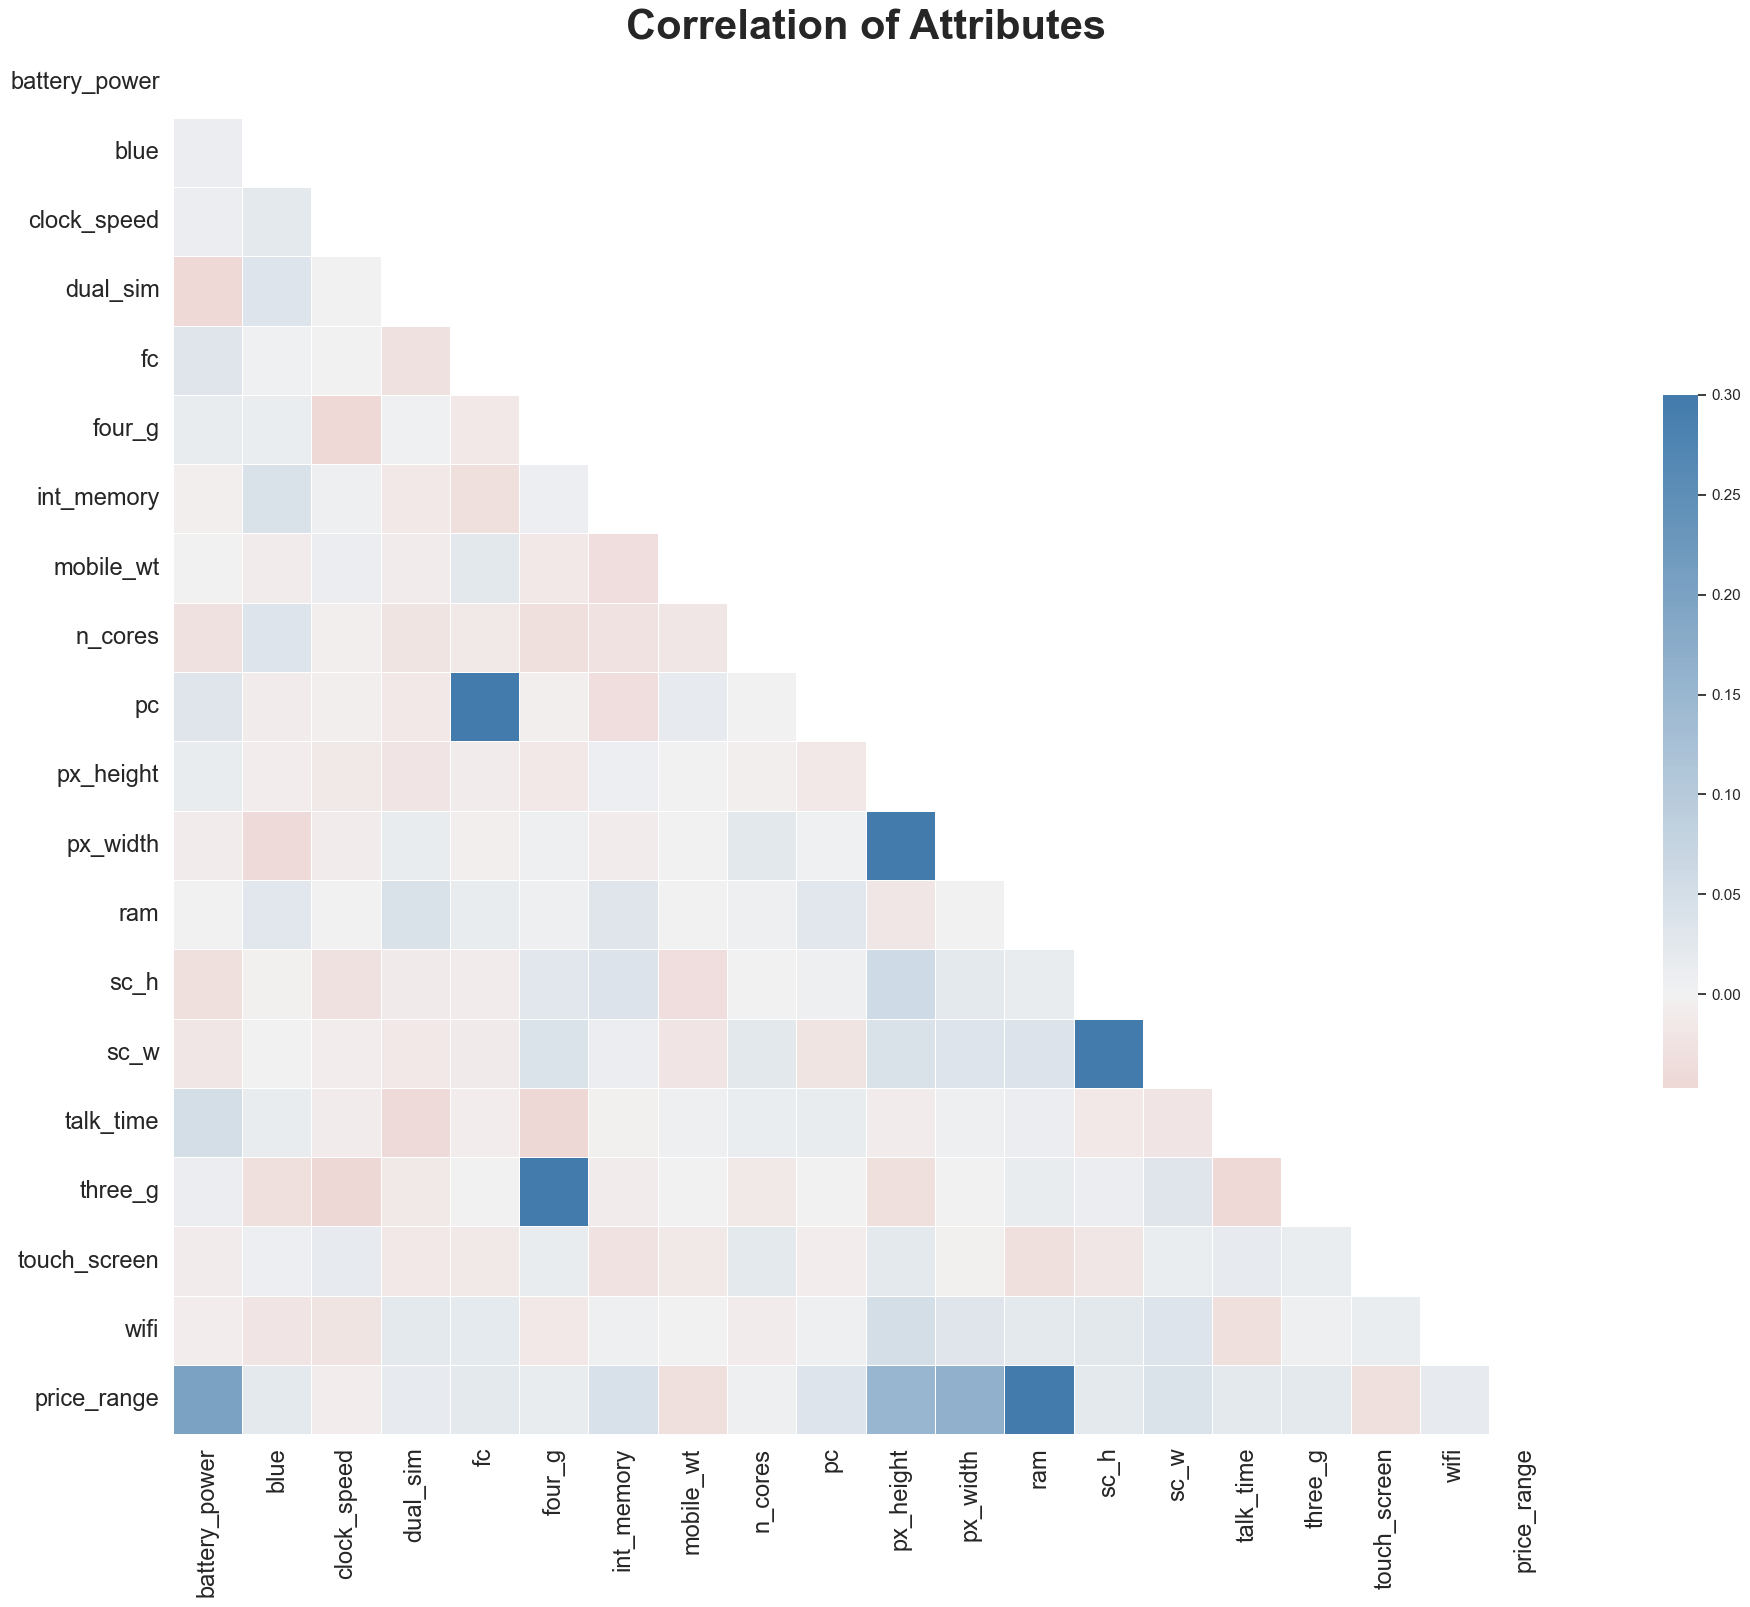

In [341]:
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(15,963 ,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attributes",fontsize=30,fontweight='bold')
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

### have high correlation with each other
* pc and fc
* three_g and four_g
* px_width and px_height 

# <div class='alert-info'> Correlation between Attributes and Price Range  </div>

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

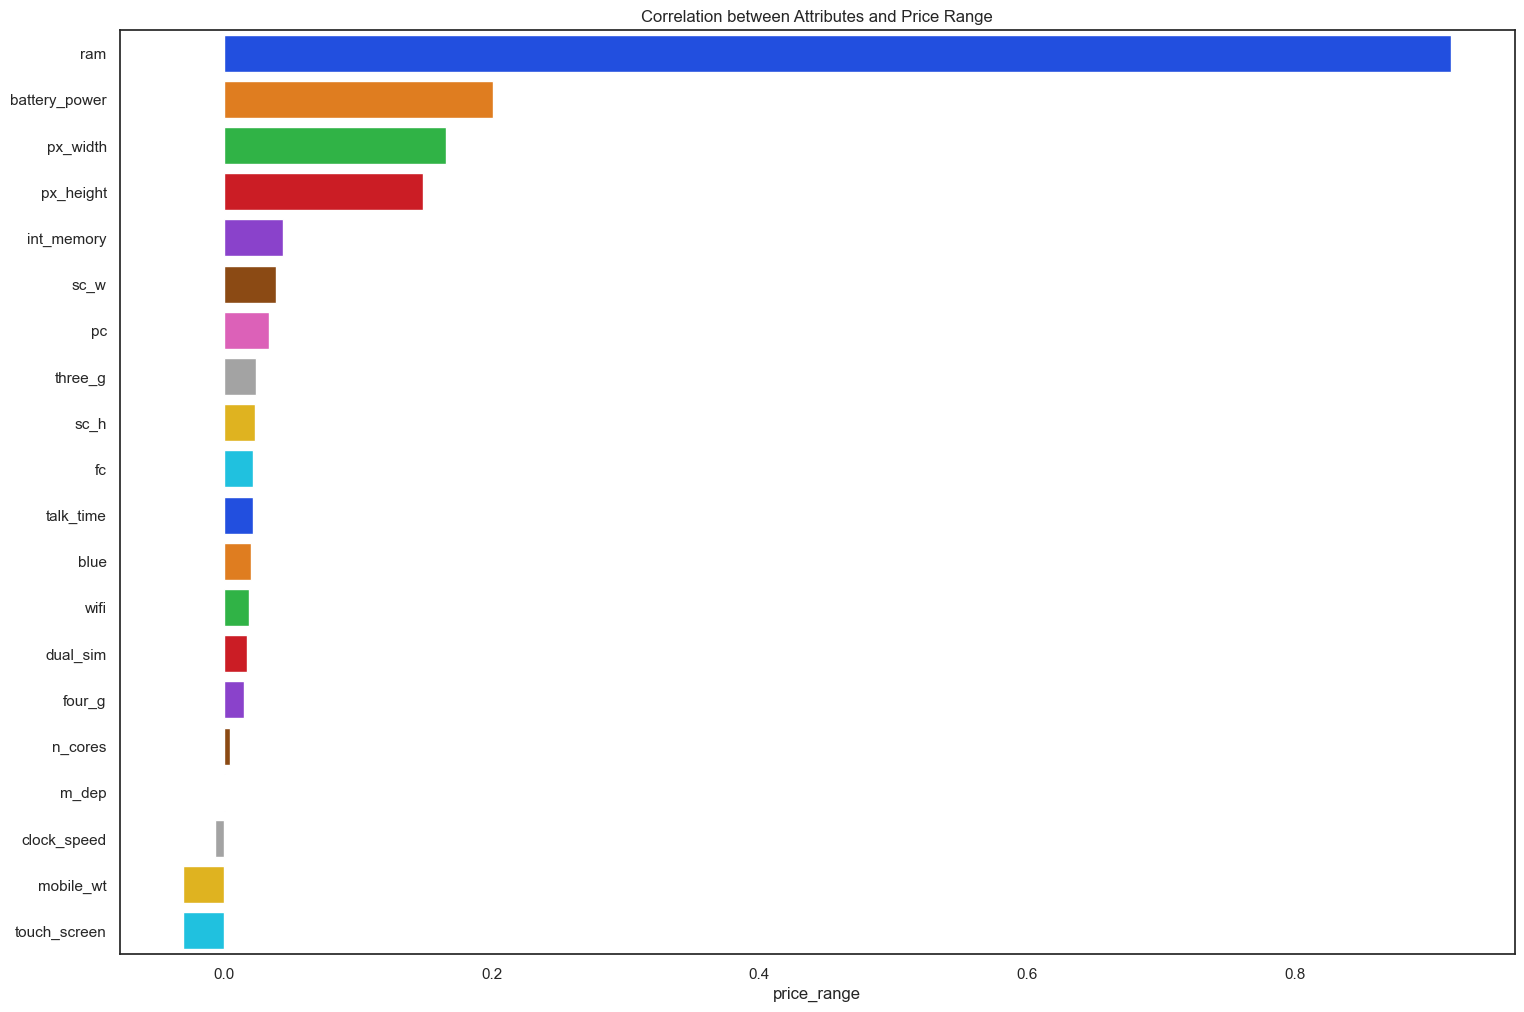

In [266]:
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

#sns = samuel norman seaborne

In [267]:
import matplotlib.ticker as mtick

##  <div class='alert-danger'> Battery power  </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

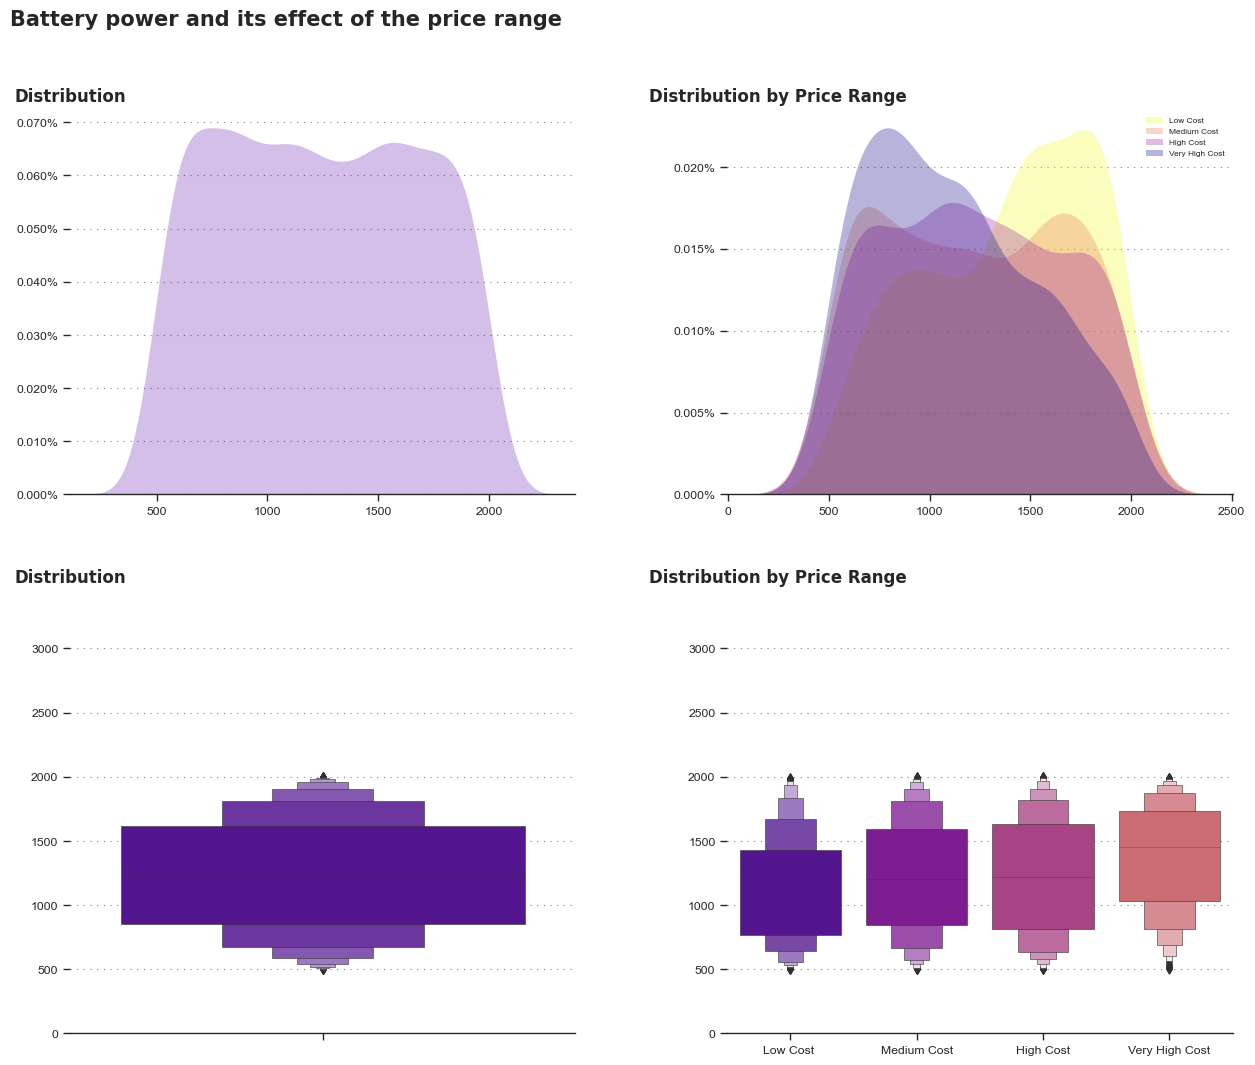

In [268]:
sns.set(rc={"figure.dpi":100})
sns.set_context('paper')
sns.set_style("ticks")

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Battery power and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0, 3000),xlim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0, 3000))

#Axis 0 


 #Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables.
 
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='battery_power',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='battery_power',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Clock Speed  </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

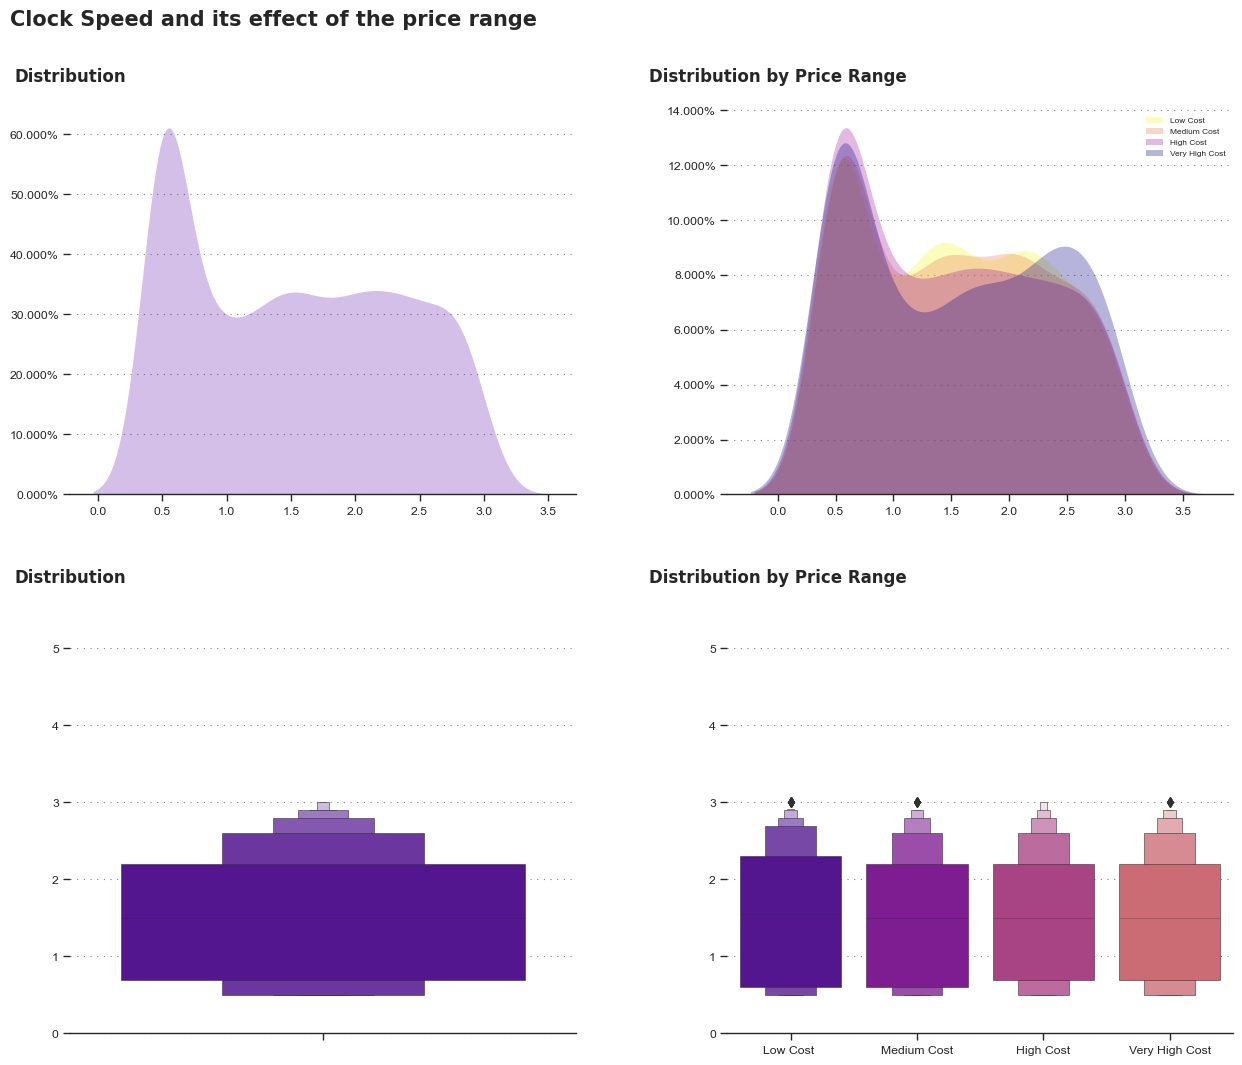

In [269]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Clock Speed and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,5))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='clock_speed',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='clock_speed',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Front Camera mega-pixels  </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

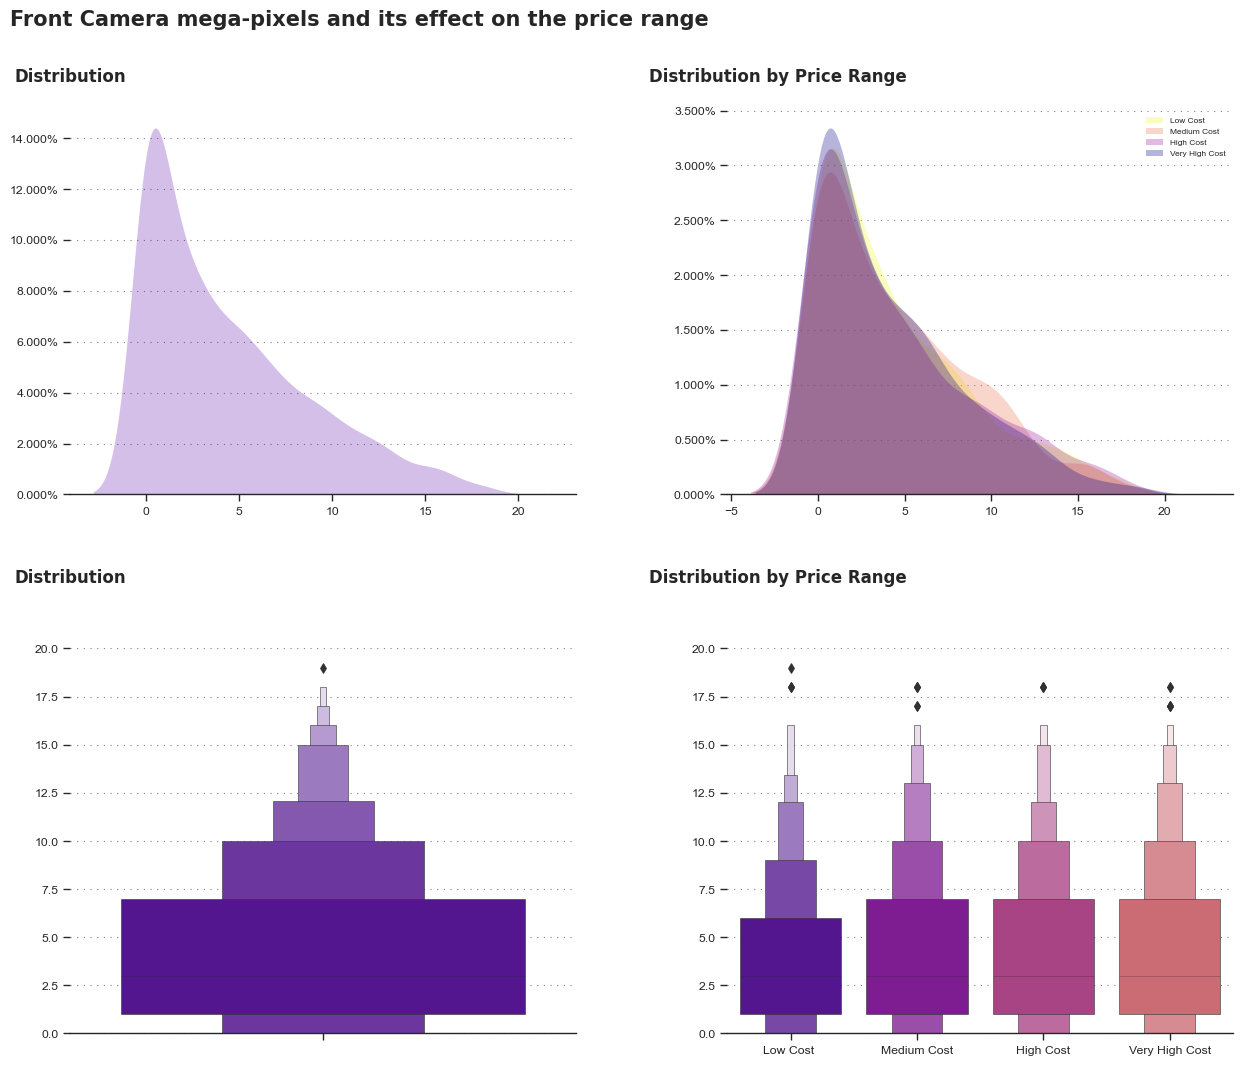

In [270]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Front Camera mega-pixels and its effect on the price range', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,20))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,20))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='fc',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='fc',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Internal Memory(Gigabyte)  </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

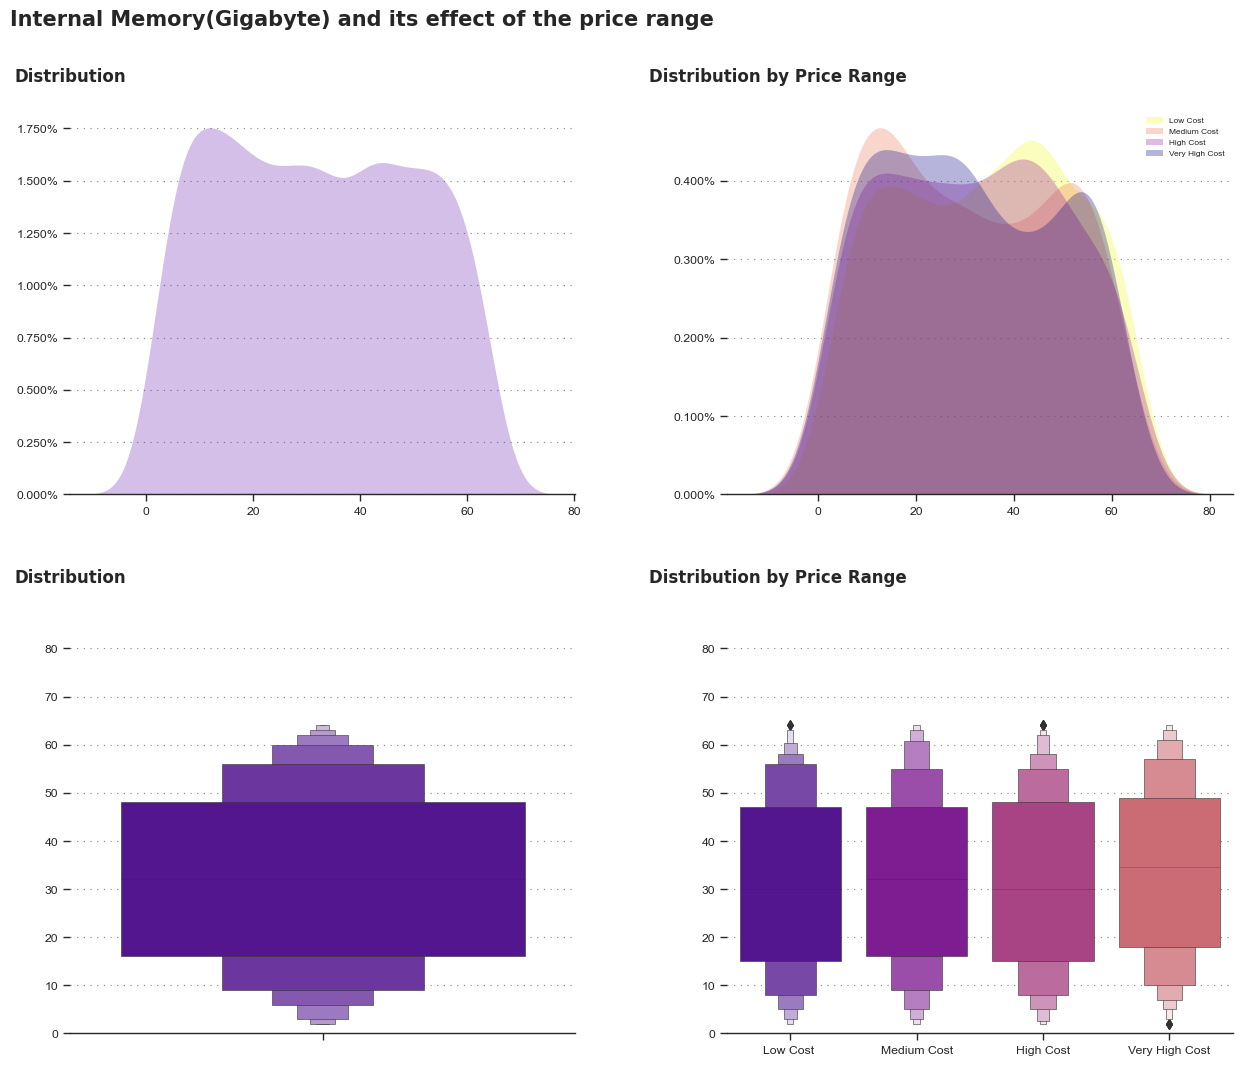

In [271]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Internal Memory(Gigabyte) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,80))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,80))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='int_memory',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='int_memory',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Mobile Depth in cm  </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

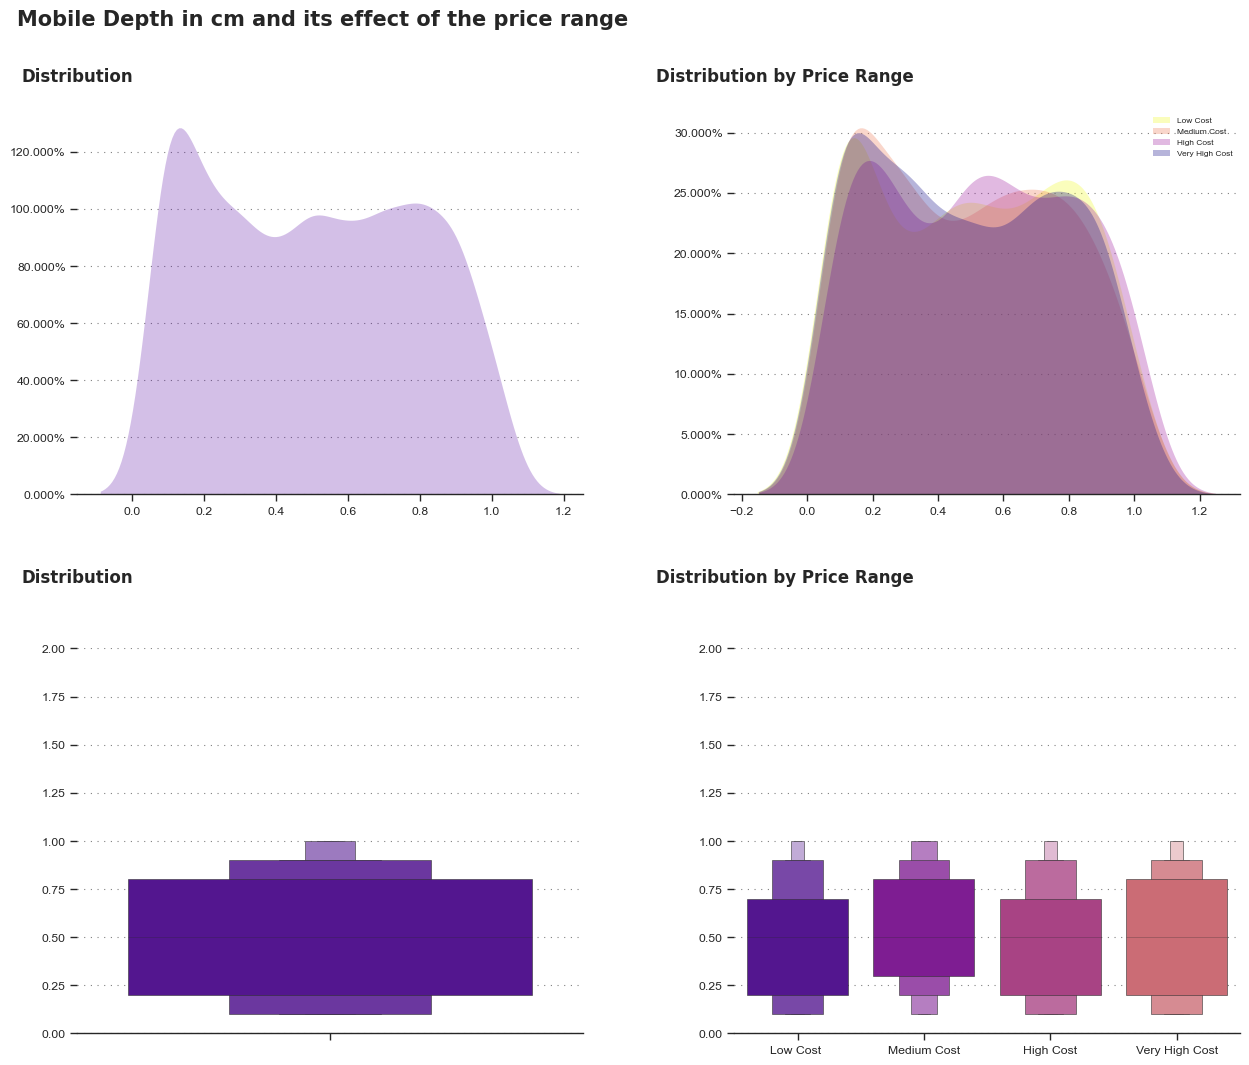

In [272]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Depth in cm and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,2))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,2))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='m_dep',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='m_dep',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Mobile Phone Weight </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

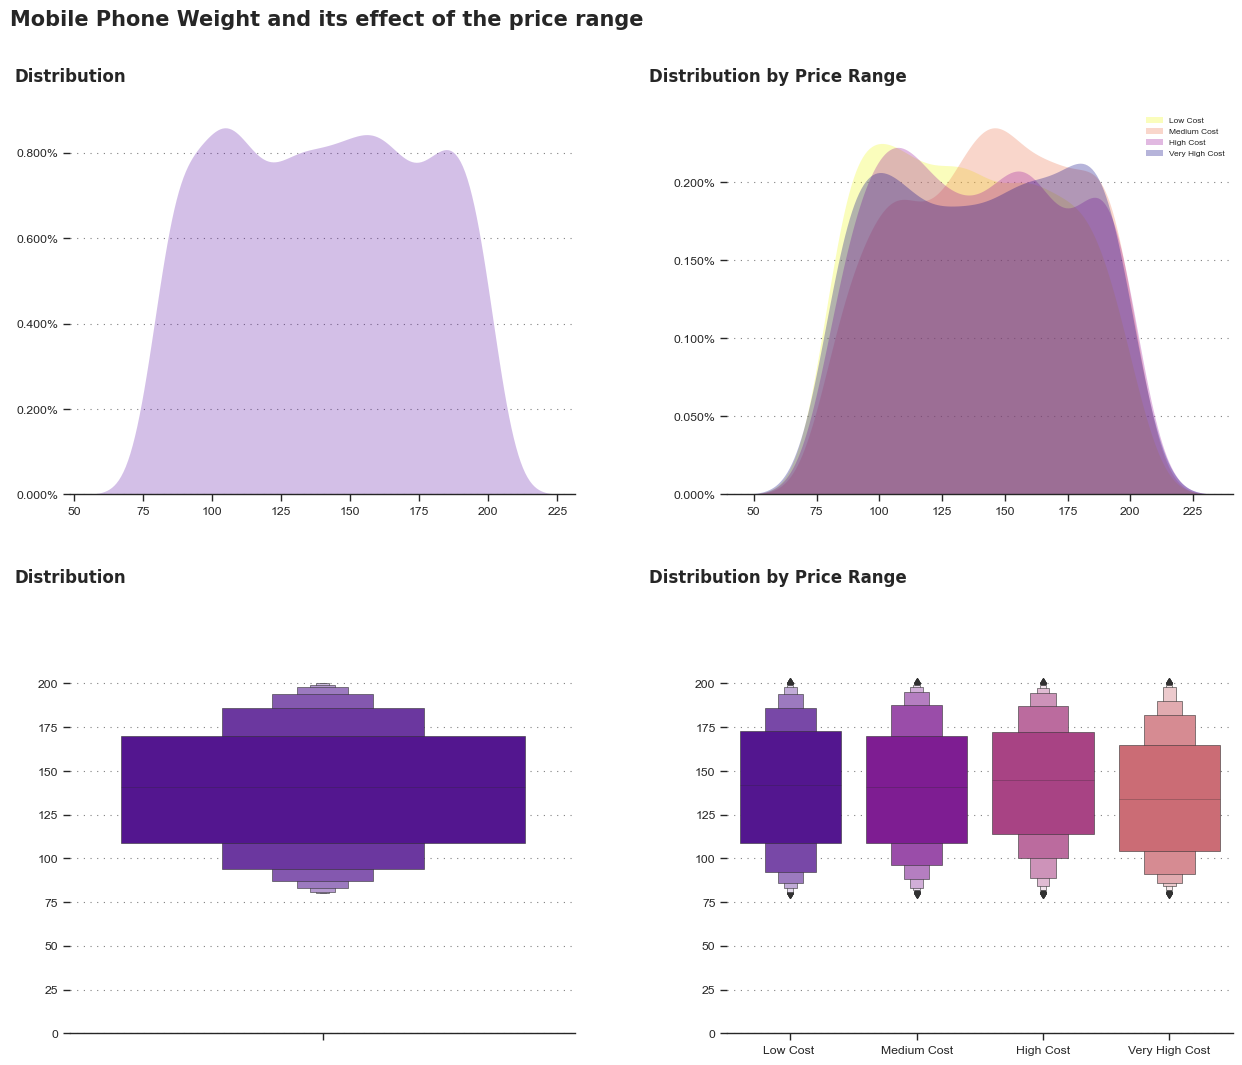

In [273]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Phone Weight and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,220))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,220))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='mobile_wt',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='mobile_wt',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Number of cores </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

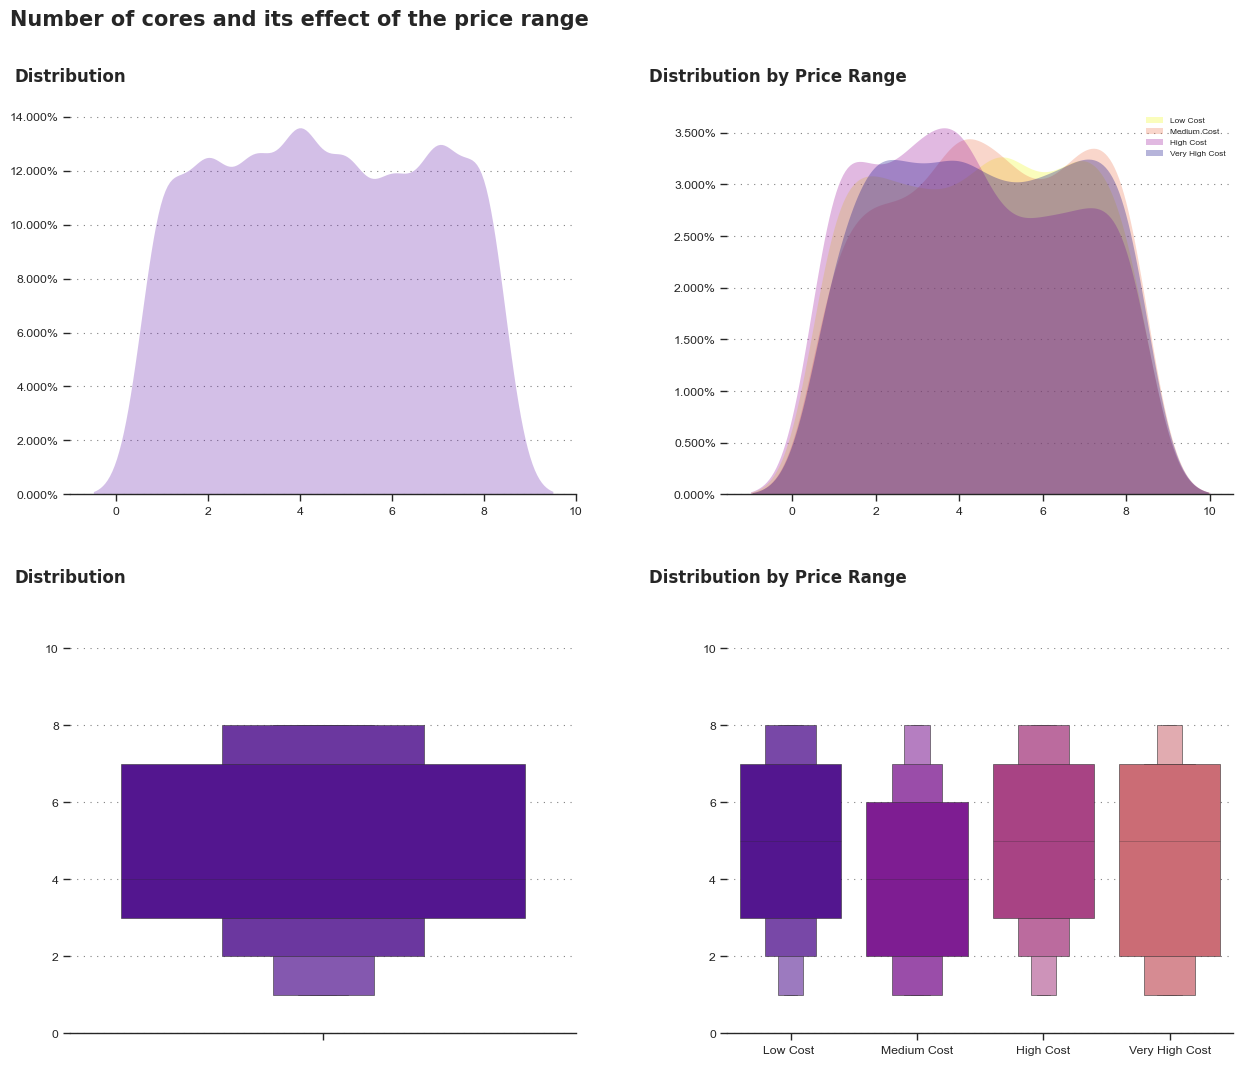

In [274]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Number of cores and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,10))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,10))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='n_cores',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='n_cores',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Primary Camera mega pixels </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

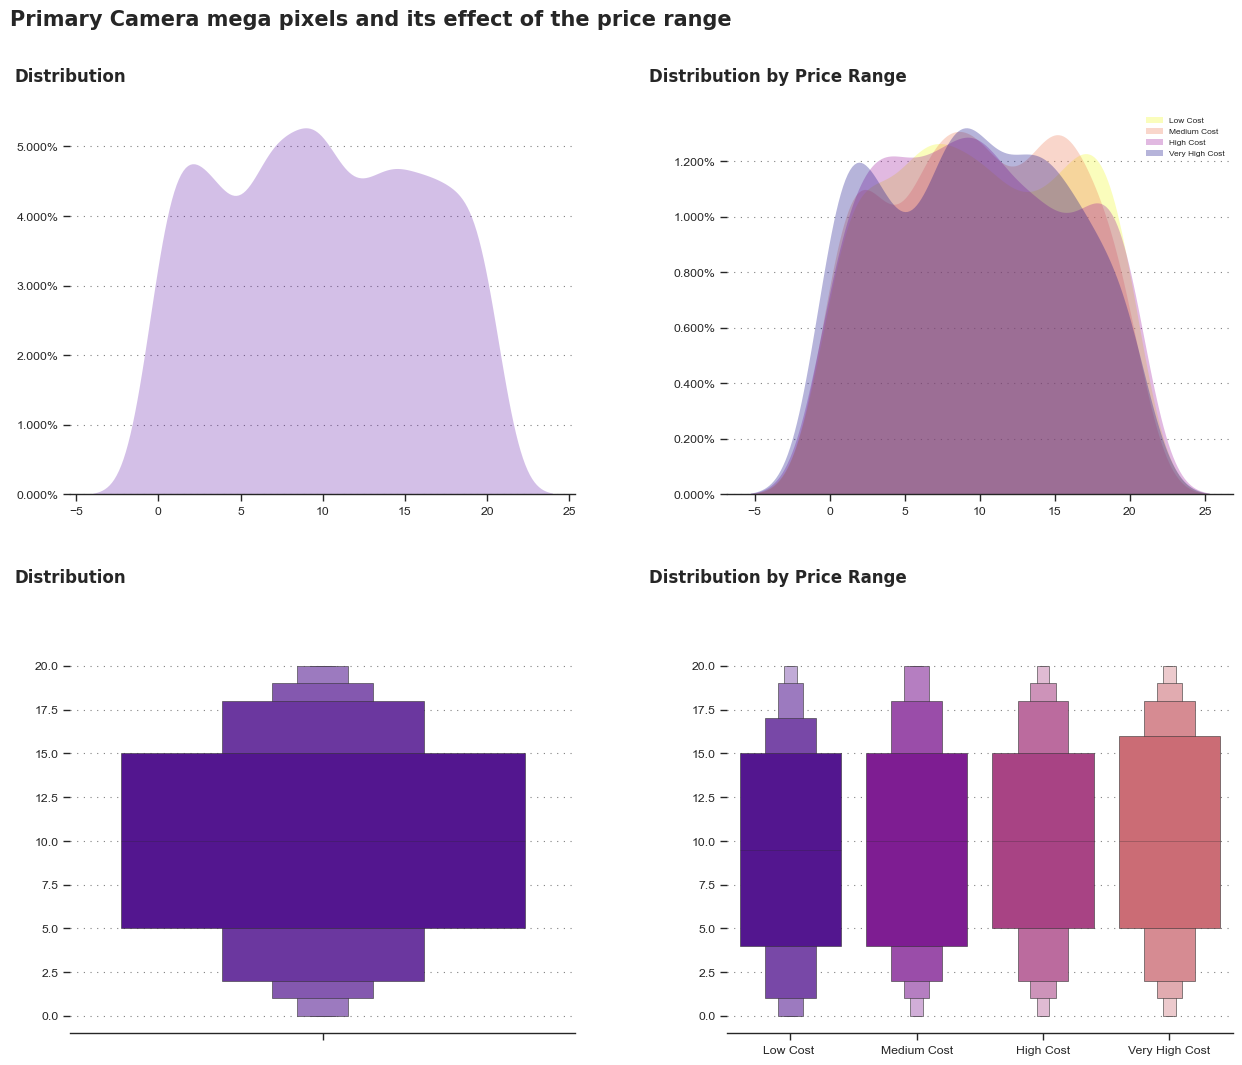

In [275]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Primary Camera mega pixels and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='pc',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='pc',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Pixel resolution height </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

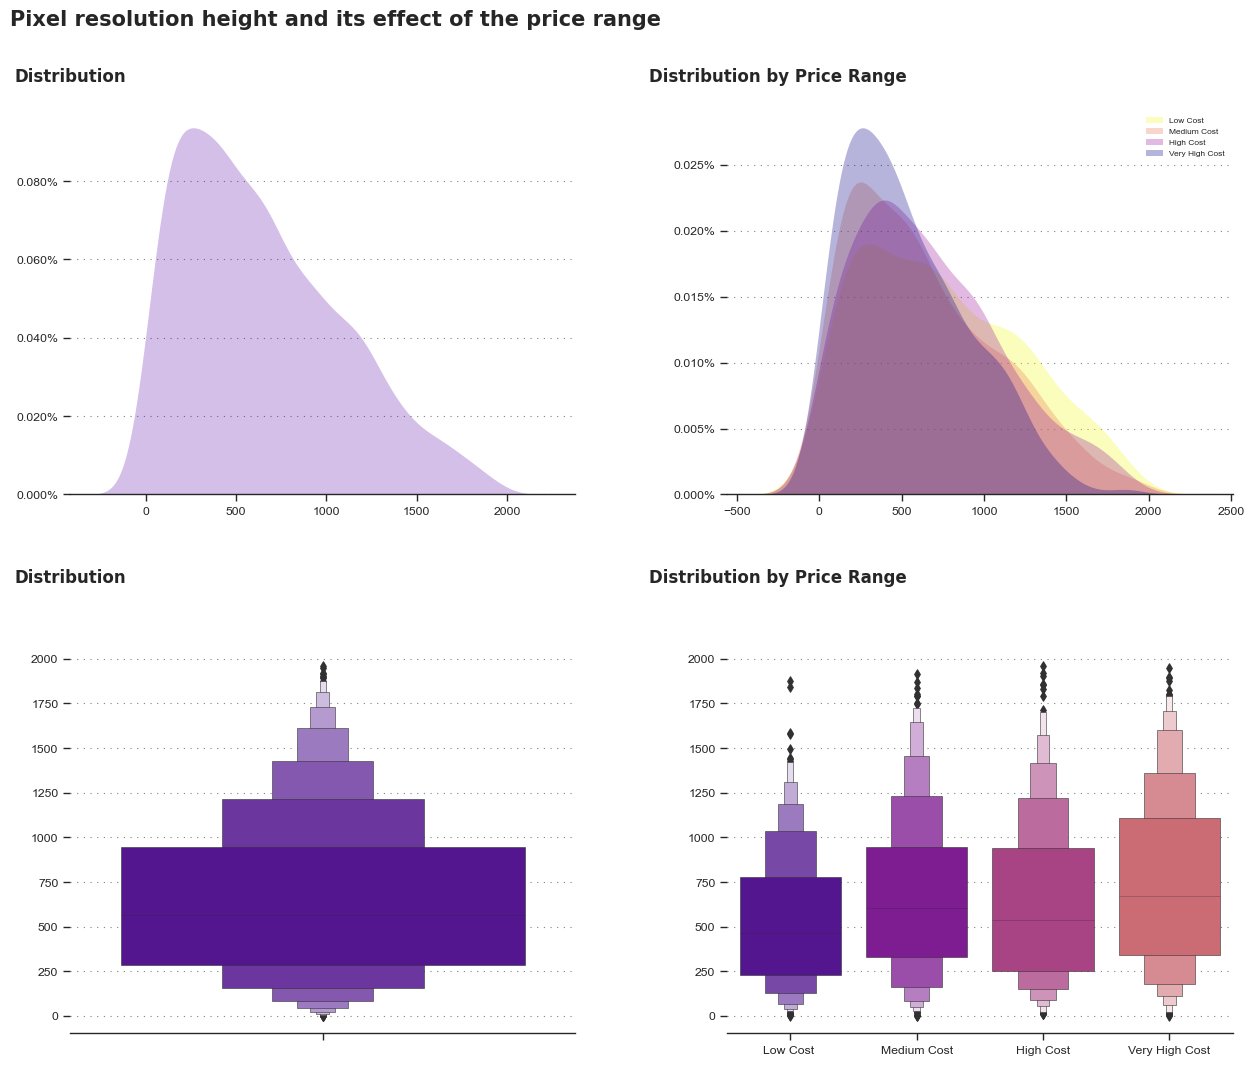

In [276]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel resolution height and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='px_height',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_height',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Pixel Resolution Width </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

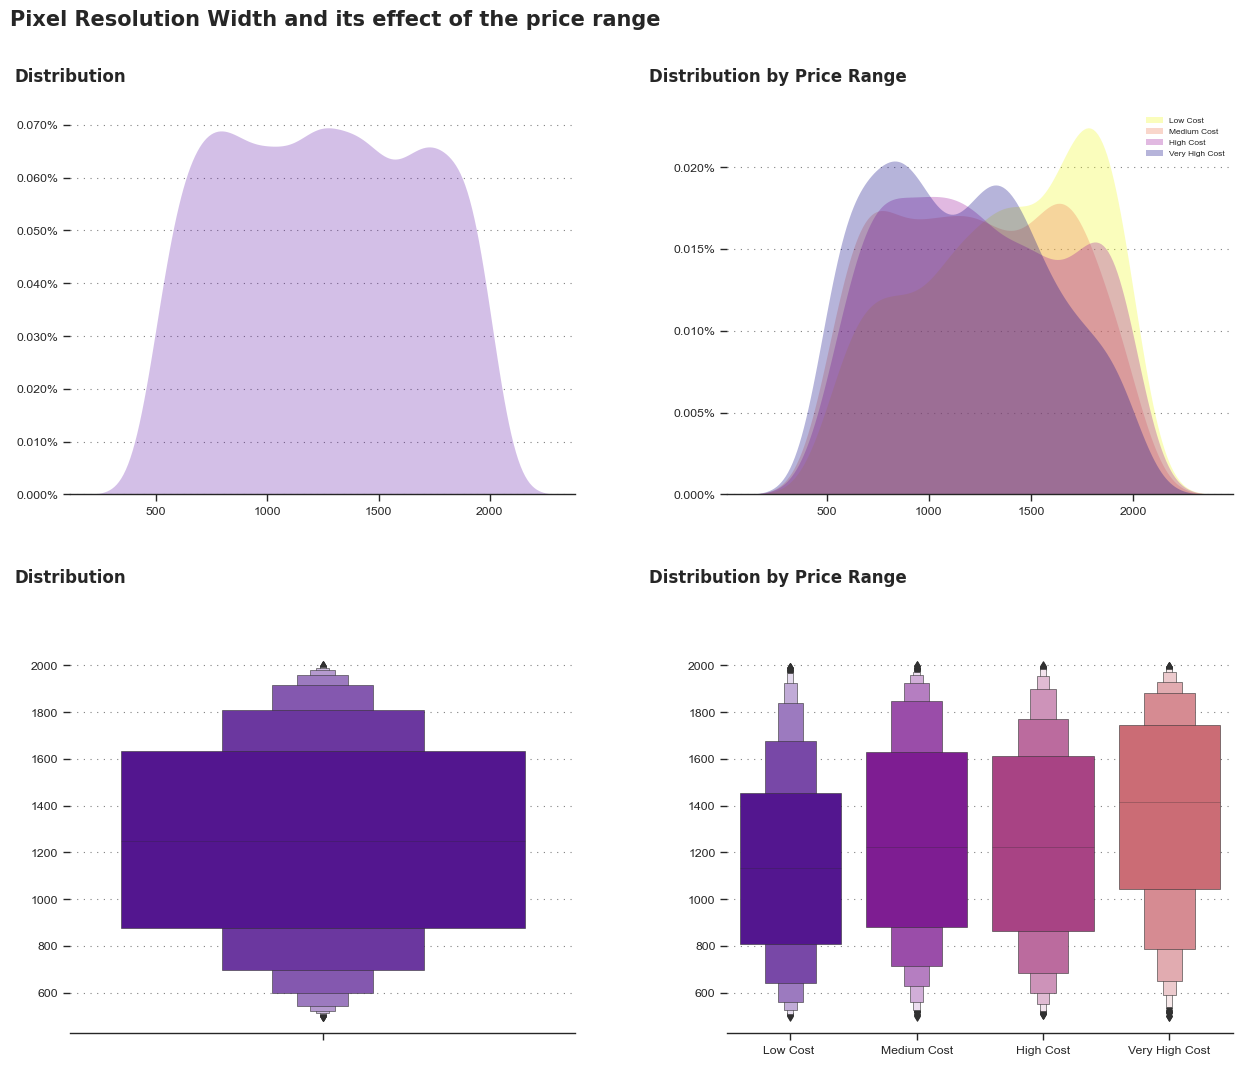

In [277]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel Resolution Width and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', dashes=(1,5))
sns.boxenplot(y='px_width',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_width',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Random Access Memory(RAM) </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

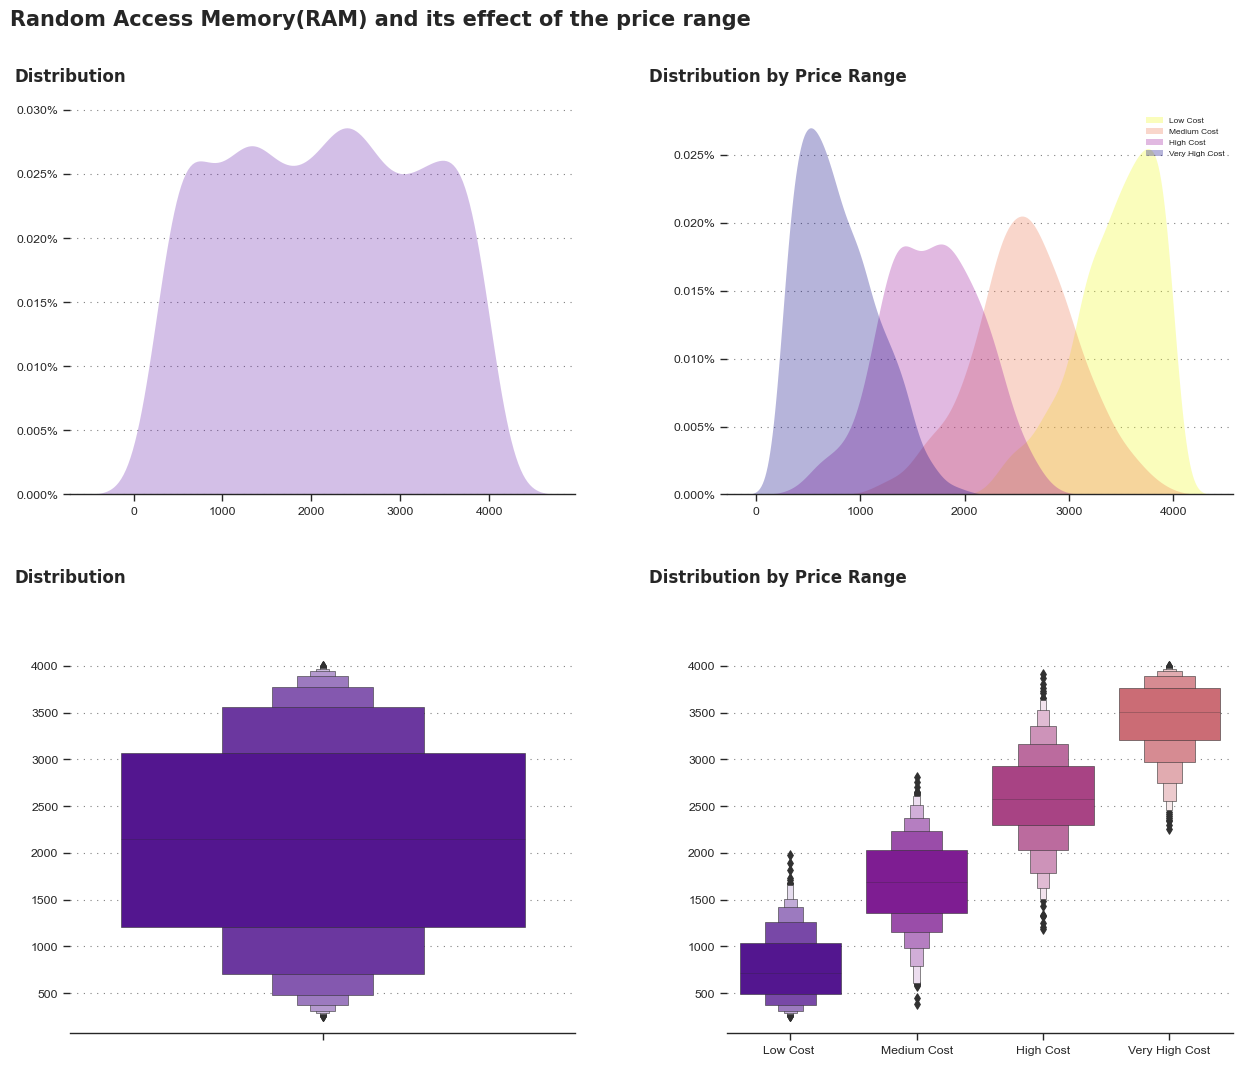

In [278]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Random Access Memory(RAM) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='ram',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='ram',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Screen Height of mobile </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

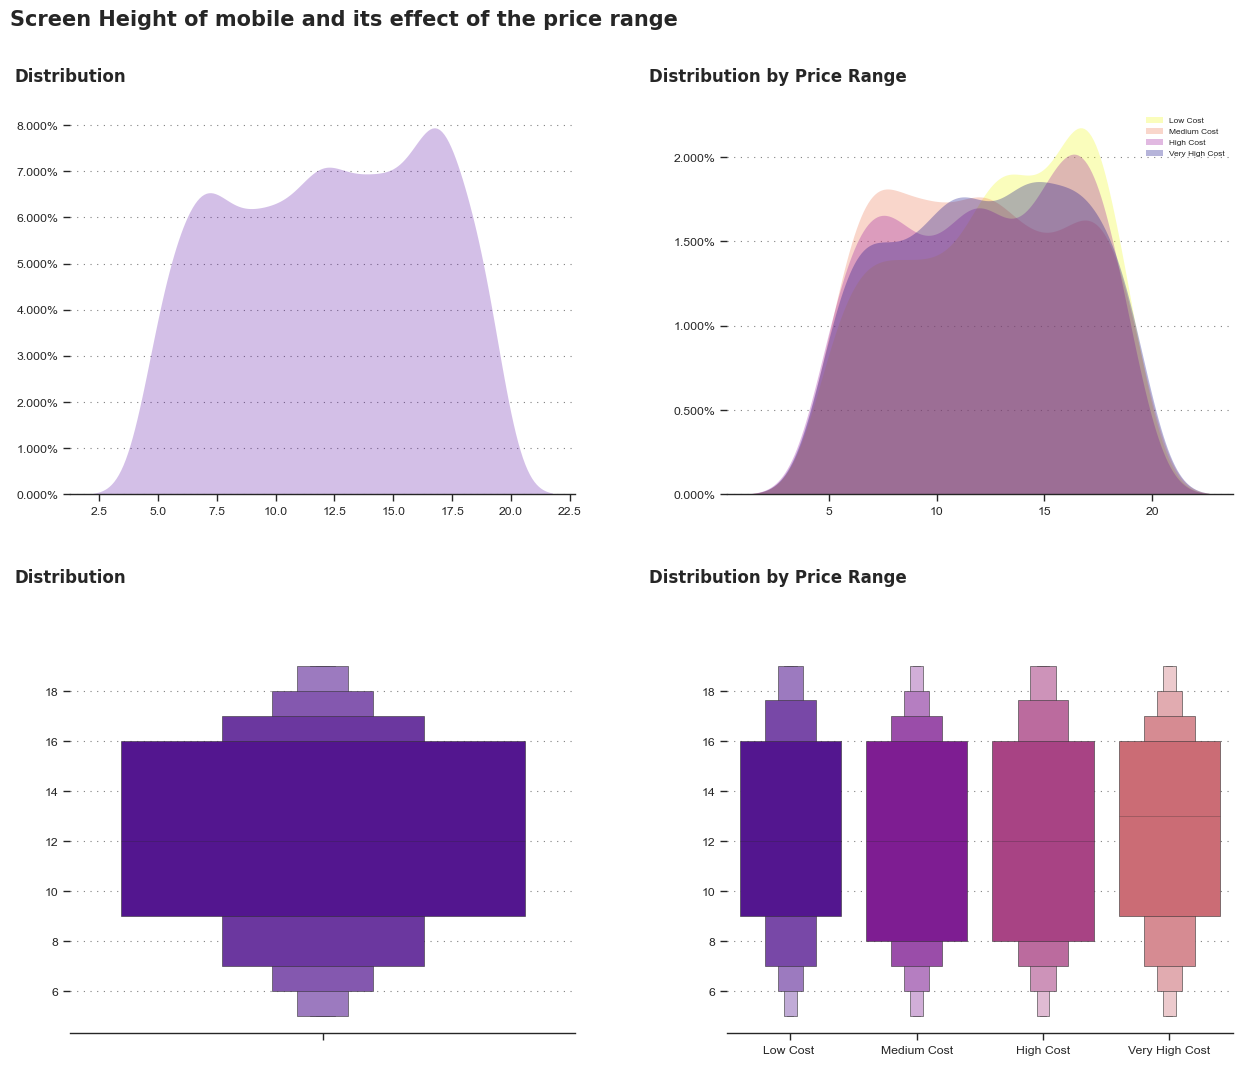

In [279]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Height of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='sc_h',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_h',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Screen Width of mobile </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

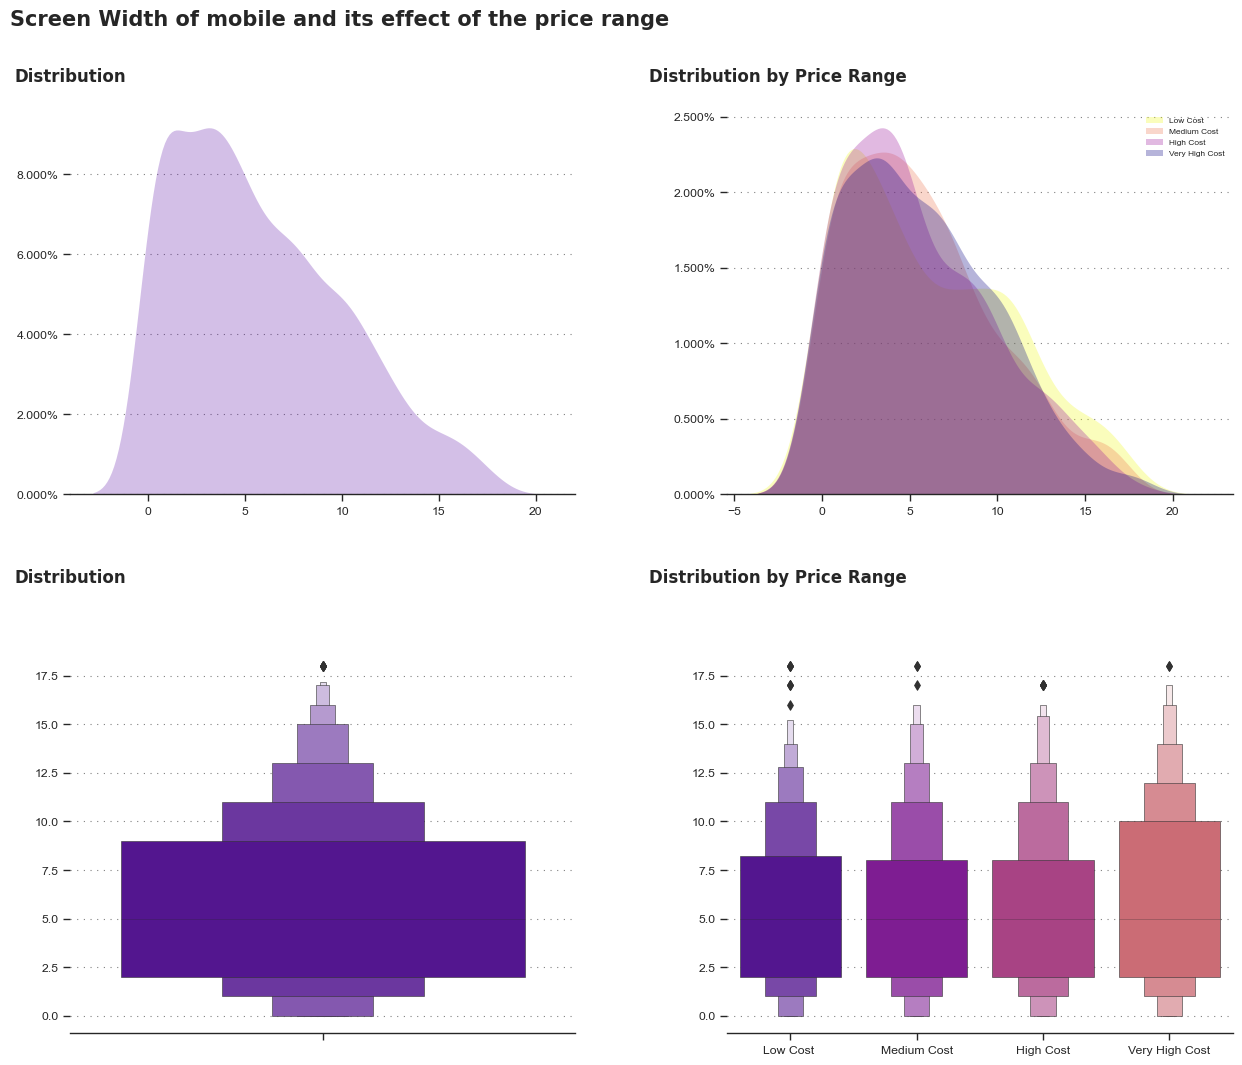

In [280]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Width of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='sc_w',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_w',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Longest time that a single battery charge will last </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

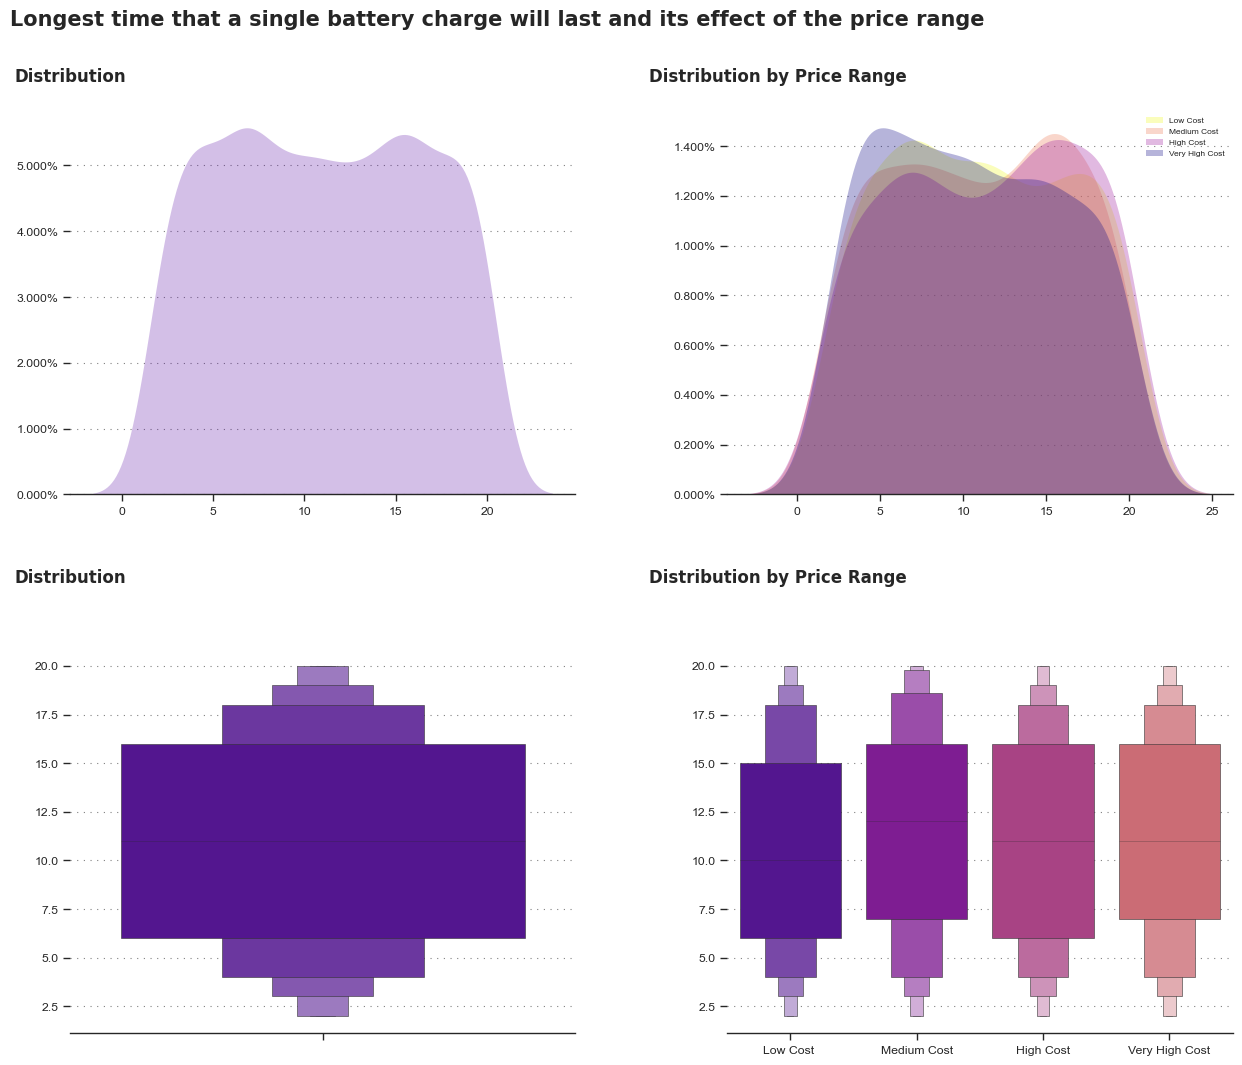

In [281]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Longest time that a single battery charge will last and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='talk_time',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='talk_time',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## <div class='alert-danger'> Bluetooth </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

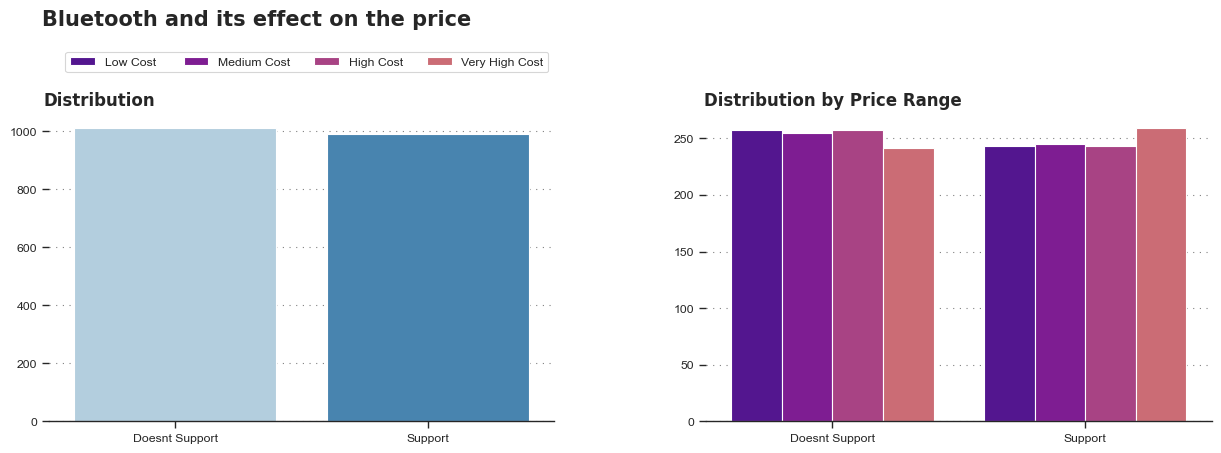

In [282]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Bluetooth and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='blue',
           data=data,
            palette='Blues',
           ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='blue',
             data=data,
             hue='price_range',
             ax=ax1)

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## <div class='alert-danger'> Dual-sim </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

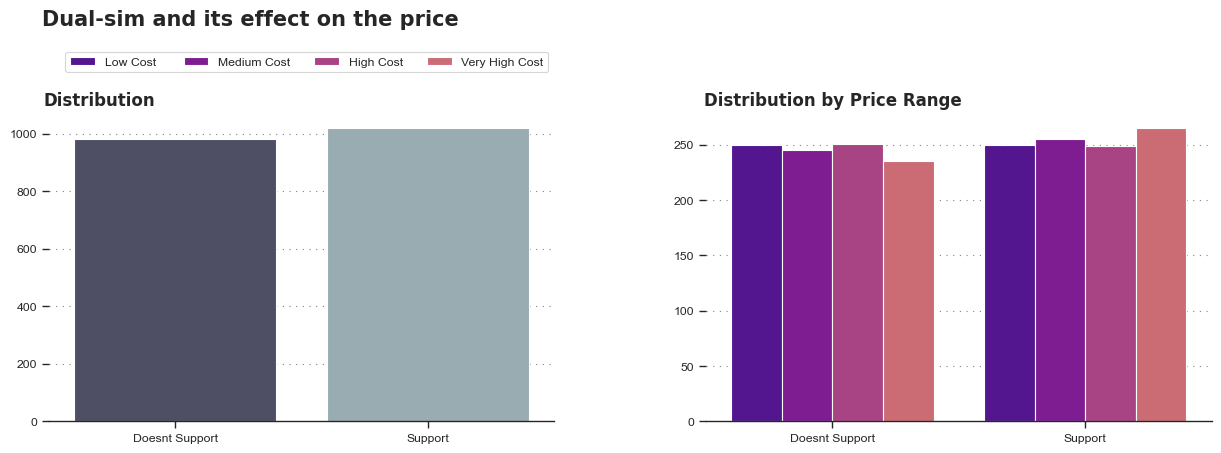

In [283]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Dual-sim and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='dual_sim',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='dual_sim',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## <div class='alert-danger'> 4G </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

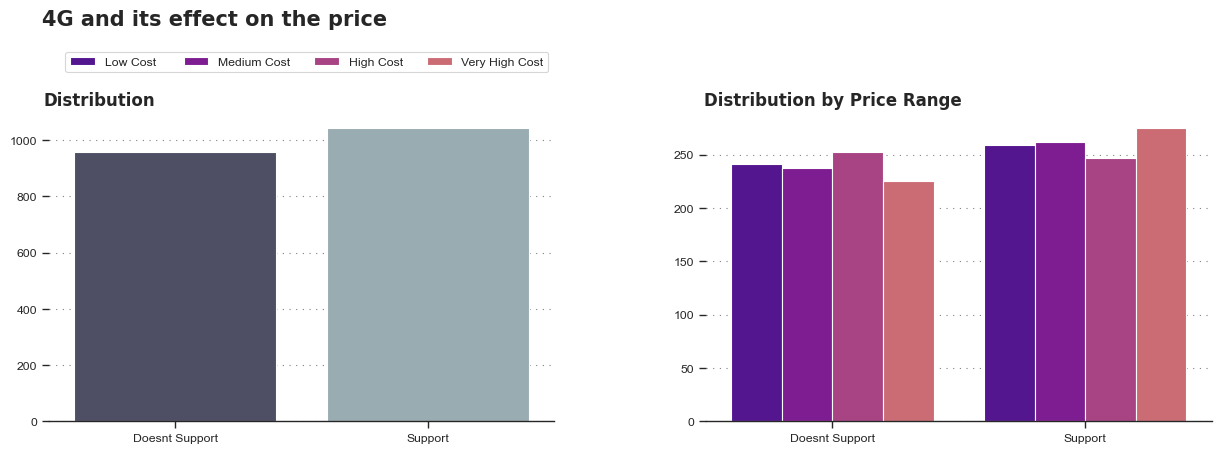

In [284]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'4G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='four_g',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='four_g',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## <div class='alert-danger'> 3G </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

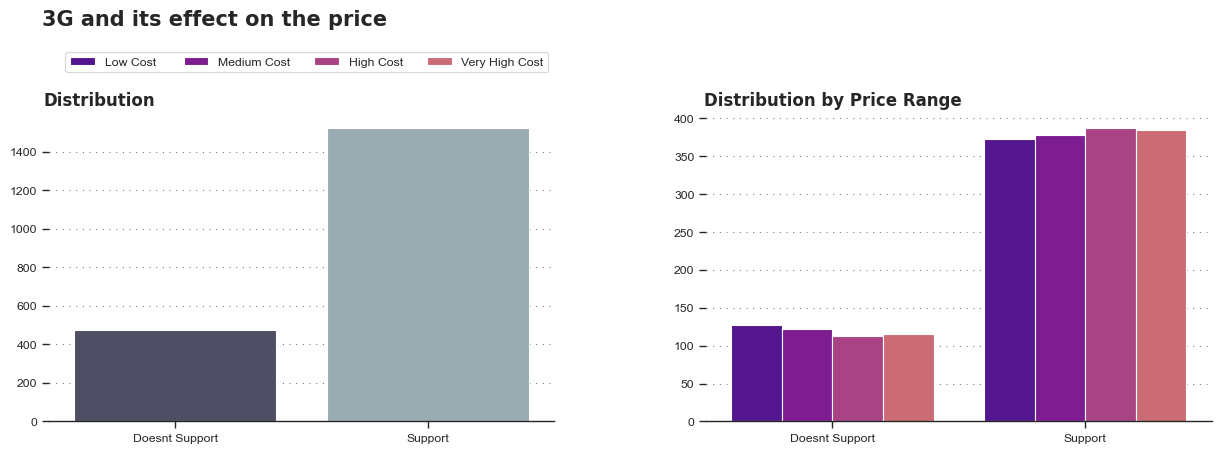

In [285]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'3G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='three_g',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='three_g',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## <div class='alert-danger'> Touch Screen </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

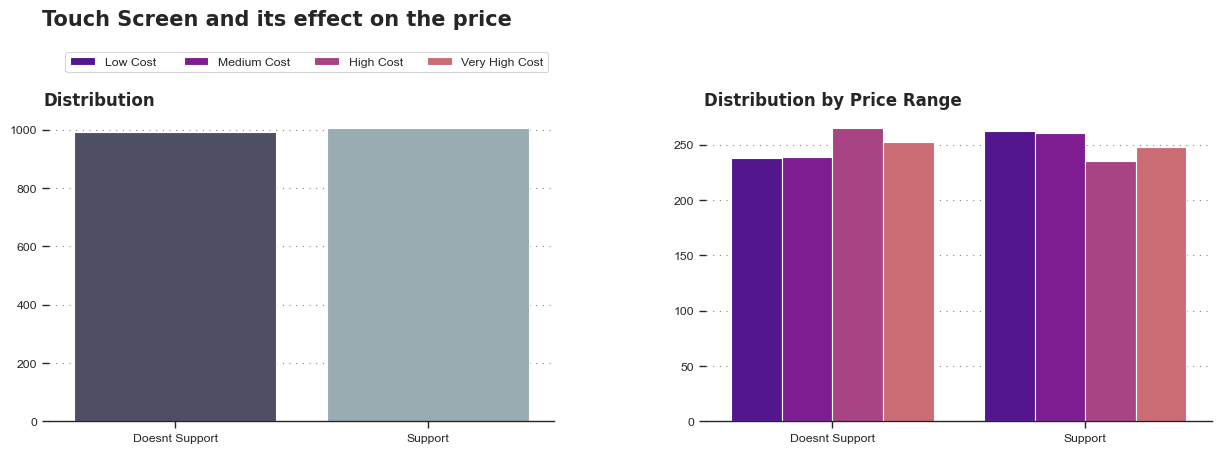

In [286]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Touch Screen and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='touch_screen',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='touch_screen',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## <div class='alert-danger'> Wi-fi </div>

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

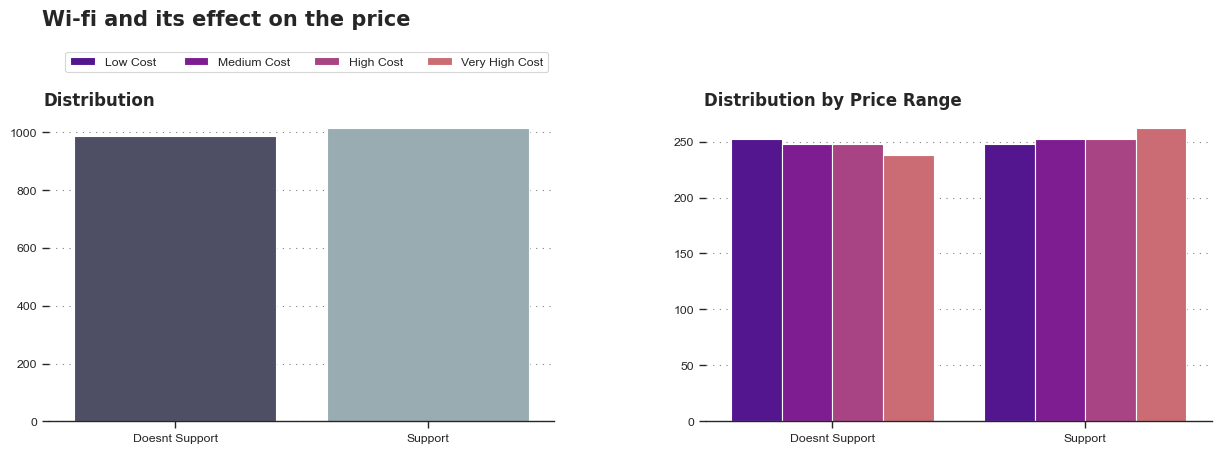

In [287]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Wi-fi and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='wifi',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='wifi',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

In [288]:
CatCols= ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

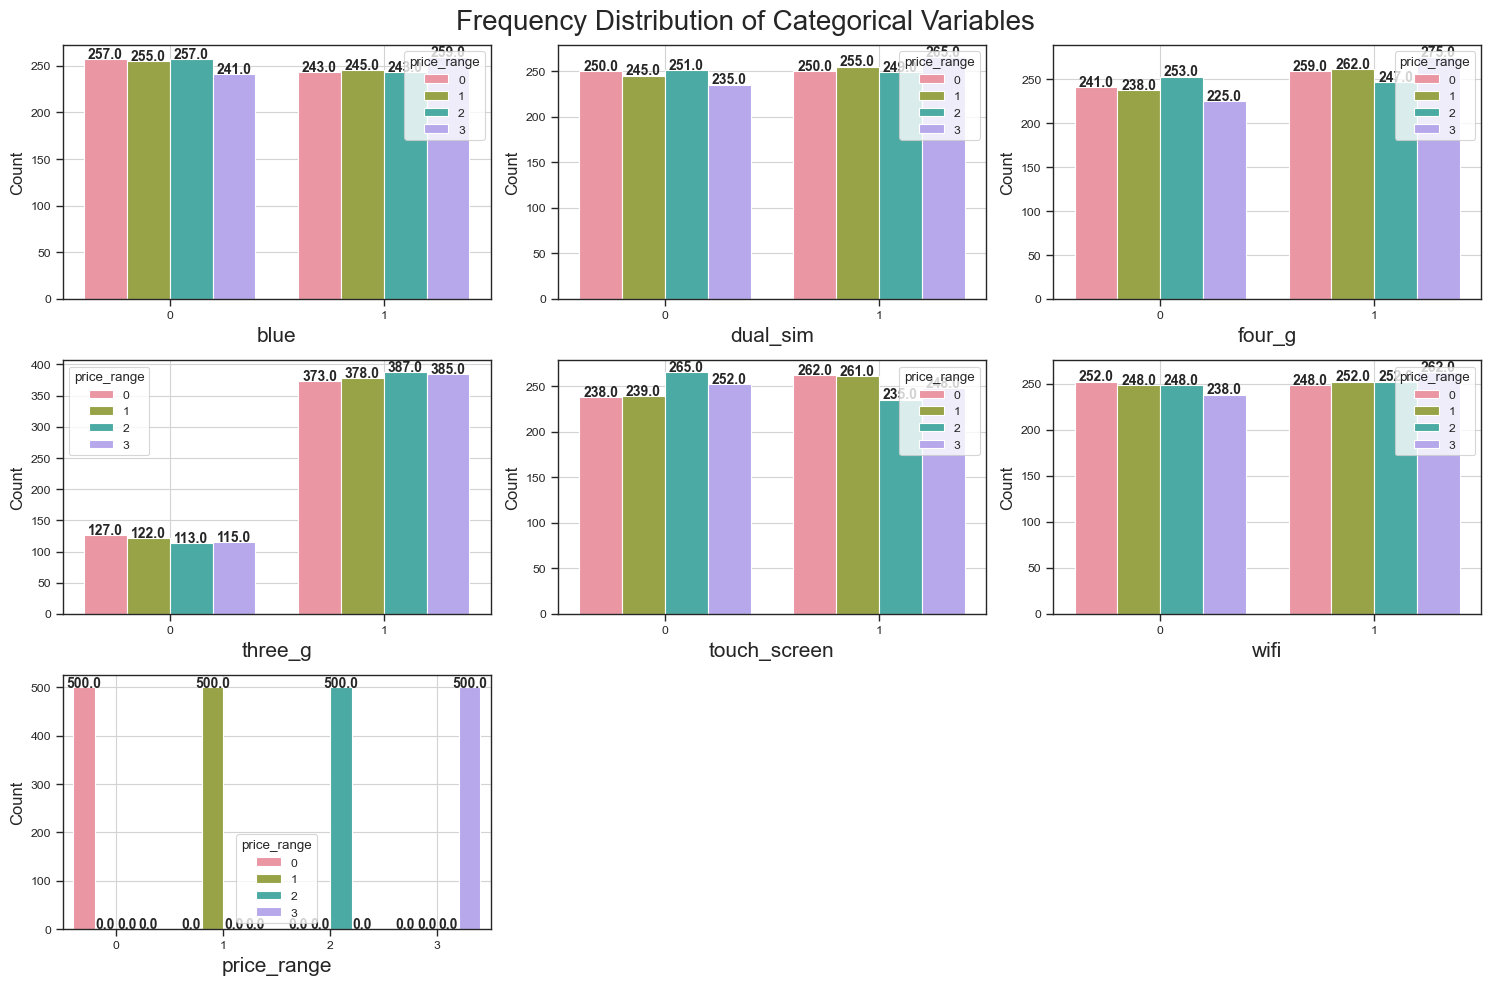

In [289]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
    row = i//3
    col = i%3               
    graph = sns.countplot(x=CatCols[i],hue=data['price_range'],data=data, ax=ax[row,col])
    ax[row,col].set_xlabel(CatCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticklabels(ax[row,col].get_xticks())
    ax[row,col].grid(color='lightgrey')      
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
ax[-1,2].axis('off')
ax[-1,1].axis('off')
plt.tight_layout()
plt.show()

In [290]:
NumCols = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt',
          'n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

In [291]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(18,12), dpi=550)
c = '#0055ff'
fig.set_size_inches(25, 20)
for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(data[NumCols[i]], 
                                     range=(np.floor(data[NumCols[i]].min()), np.ceil(data[NumCols[i]].max())))                
    graph = sns.histplot(data=data, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %data[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %data[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(data[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %data[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %data[NumCols[i]].max()
    ))
    ax[row,col].text(0.1, 0.37, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='red', pad=0.5))


ax[-1,2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=30,fontweight='bold',y=1.05) 
plt.tight_layout()   
plt.show()

# <div class='alert-info'> Now here we decided to drop some rows and a column... </div>

## Let's check out!

In [292]:
data['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

* Here we know mobile depth can't be less than 0.6 cm, So we this column

In [293]:
data.drop('m_dep',axis=1,inplace=True)
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0           188        2   2         20       756  2549     9     7   
1           136        3   6        905      1988  2631    17     3   
2           145        5   6       1263      1716  2603    11     2   
3           131        6   9       1216      1786  2769    16     8   
4           141        2  14       1208      1212  1411     8     2   
...         ...      ...  ..        ...       ...   ...   ...   ...   
1995        106        6  14       1222      1890   668    13     4   
1996        187        4   3        915      1965  2032    11    10   
1997        108        8   3        868      1632  3057     9     1   
1998        145        5   5        336       670   869    18    10   
1999        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 20 columns]

In [294]:
data.loc[data['px_height']==0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481         99        4  11          0      1987  3692    13     0   
1933        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1

* Pixel Resolution Height can't be 0 !!!
### So drop this two rows

In [295]:
data.drop(index=[1481,1933],inplace=True)
data.reset_index(inplace=True)

In [296]:
data.drop('index',axis=1,inplace=True)

In [297]:
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1993            794     1          0.5         1   0       1           2   
1994           1965     1          2.6         1   0       0          39   
1995           1911     0          0.9         1   1       1          36   
1996           1512     0          0.9         0   4       1          46   
1997            510     1          2.0         1   5       1          45   

      mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0           188        2   2         20       756  2549     9     7   
1           136        3   6        905      1988  2631    17     3   
2           145        5   6       1263      1716  2603    11     2   
3           131        6   9       1216      1786  2769    16     8   
4           141        2  14       1208      1212  1411     8     2   
...         ...      ...  ..        ...       ...   ...   ...   ...   
1993        106        6  14       1222      1890   668    13     4   
1994        187        4   3        915      1965  2032    11    10   
1995        108        8   3        868      1632  3057     9     1   
1996        145        5   5        336       670   869    18    10   
1997        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1993         19        1             1     0            0  
1994         16        1             1     1            2  
1995          5        1             1     0            3  
1996         19        1             1     1            0  
1997          2        1             1     1            3  

[1998 rows x 20 columns]

## <div class='alert-info'> Now creat Final dataframe </div>

In [298]:
#data.drop(['mobile_wt','px_width','sc_h'],axis=1,inplace=True)
Final_df = pd.DataFrame(data)
Final_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1993            794     1          0.5         1   0       1           2   
1994           1965     1          2.6         1   0       0          39   
1995           1911     0          0.9         1   1       1          36   
1996           1512     0          0.9         0   4       1          46   
1997            510     1          2.0         1   5       1          45   

      mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0           188        2   2         20       756  2549     9     7   
1           136        3   6        905      1988  2631    17     3   
2           145        5   6       1263      1716  2603    11     2   
3           131        6   9       1216      1786  2769    16     8   
4           141        2  14       1208      1212  1411     8     2   
...         ...      ...  ..        ...       ...   ...   ...   ...   
1993        106        6  14       1222      1890   668    13     4   
1994        187        4   3        915      1965  2032    11    10   
1995        108        8   3        868      1632  3057     9     1   
1996        145        5   5        336       670   869    18    10   
1997        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1993         19        1             1     0            0  
1994         16        1             1     1            2  
1995          5        1             1     0            3  
1996         19        1             1     1            0  
1997          2        1             1     1            3  

[1998 rows x 20 columns]

# <div class='alert-info'> Now creat Final dataframe: </div>
<div class='alert-info'> * Decision Tree </div>
<div class='alert-info'> * Random Forest </div>
<div class='alert-info'> * Svm  </div>

In [299]:
X = Final_df.drop('price_range',axis=1)
y = Final_df['price_range']

# <div class='alert-danger'> Decision Tree </div>

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [301]:
from sklearn.model_selection import GridSearchCV

In [302]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [303]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node

max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(0,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [304]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 0, 10, 20, 30, 40])})

In [305]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 10}

* Instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion

In [306]:
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=4,
 max_leaf_nodes=14,
 min_samples_leaf=10)


decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
y_pred = decision_tree_Grid.predict(X_test)

In [307]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.805


### compute the confusion matrix

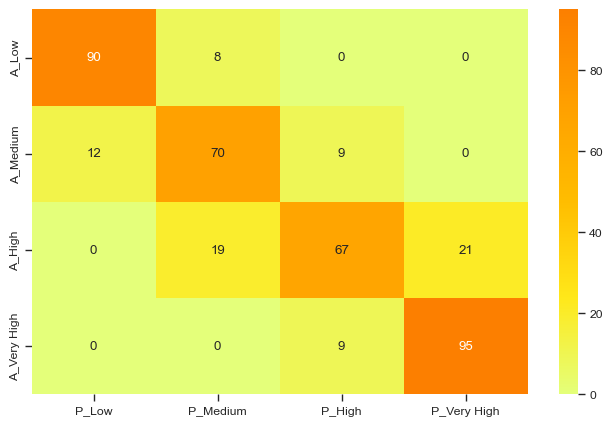

In [308]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Wistia")
plt.show()

In [309]:
reporDTree = classification_report(y_test, y_pred, output_dict = True)
CDTree = pd.DataFrame(reporDTree).transpose()
CDTree

precision    recall  f1-score  support
0              0.882353  0.918367  0.900000   98.000
1              0.721649  0.769231  0.744681   91.000
2              0.788235  0.626168  0.697917  107.000
3              0.818966  0.913462  0.863636  104.000
accuracy       0.805000  0.805000  0.805000    0.805
macro avg      0.802801  0.806807  0.801558  400.000
weighted avg   0.804136  0.805000  0.801153  400.000

### It's not good result at all.

# <div class='alert-danger'> Random Forest </div>

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [312]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=4)

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
y_pred = random_forest.predict(X_test)

In [313]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8883333333333333


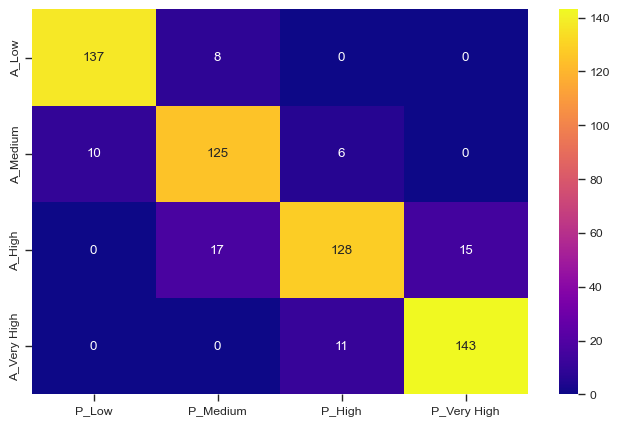

In [314]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [315]:
reportRF = classification_report(y_test, y_pred)
print(reportRF)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       145
           1       0.83      0.89      0.86       141
           2       0.88      0.80      0.84       160
           3       0.91      0.93      0.92       154

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



### Accuracy is 88% and f1 for 1 and 2 it's not good result. 

# <div class='alert-danger'> SVM </div>

In [316]:
from sklearn.svm import SVC 

In [317]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [318]:
SVM = SVC()

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)
y_pred_train = SVM.predict(X_train)

In [319]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.96


In [320]:
print("Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Accuracy: 0.9456366237482118


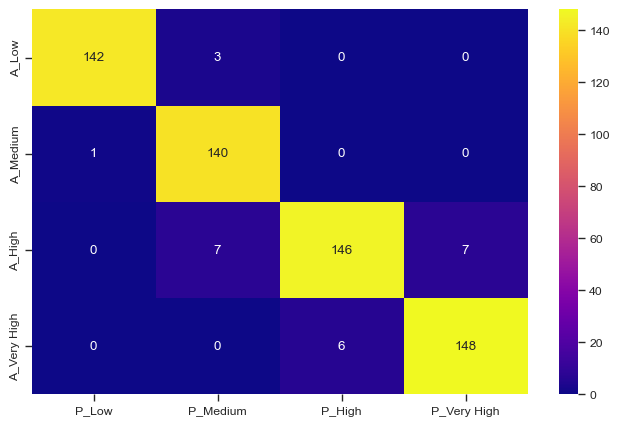

In [321]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [322]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       145
           1       0.93      0.99      0.96       141
           2       0.96      0.91      0.94       160
           3       0.95      0.96      0.96       154

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [323]:
result = classification_report(y_train, y_pred_train)
print(result)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       355
           1       0.93      0.94      0.93       358
           2       0.95      0.88      0.91       340
           3       0.94      0.98      0.96       345

    accuracy                           0.95      1398
   macro avg       0.95      0.95      0.94      1398
weighted avg       0.95      0.95      0.95      1398



##  <div class='alert-danger'> Improving SVM Model </div>

In [324]:
svm1 = SVC(C=0.2,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=1)
svm1.fit(X_train,y_train)
y_pred = svm1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.98


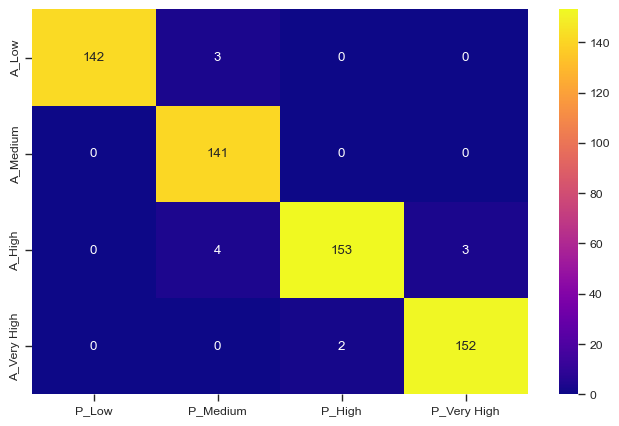

In [325]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [326]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.95      1.00      0.98       141
           2       0.99      0.96      0.97       160
           3       0.98      0.99      0.98       154

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



### Accuracy for train

In [327]:
y_pred_train = svm1.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Accuracy: 0.9921316165951359


In [328]:
result = classification_report(y_train, y_pred_train)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       0.99      0.99      0.99       358
           2       0.98      0.99      0.98       340
           3       1.00      0.99      0.99       345

    accuracy                           0.99      1398
   macro avg       0.99      0.99      0.99      1398
weighted avg       0.99      0.99      0.99      1398



## <div class='alert-danger'>Great! We got a high accuracy 98% resul from SVM Model...💥 </div>
### <div class='alert-info'> So let's doing to test_samples prediction </div>

In [329]:
data_test = pd.read_csv('test.csv')
data_test = pd.DataFrame(data_test)
data_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

## <div class='alert-info'> a quick and general look at the data_test </div>

In [330]:
data_test.describe(include='all').T

count       mean          std    min      25%     50%  \
id             1000.0   500.5000   288.819436    1.0   250.75   500.5   
battery_power  1000.0  1248.5100   432.458227  500.0   895.00  1246.5   
blue           1000.0     0.5160     0.499994    0.0     0.00     1.0   
clock_speed    1000.0     1.5409     0.829268    0.5     0.70     1.5   
dual_sim       1000.0     0.5170     0.499961    0.0     0.00     1.0   
fc             1000.0     4.5930     4.463325    0.0     1.00     3.0   
four_g         1000.0     0.4870     0.500081    0.0     0.00     0.0   
int_memory     1000.0    33.6520    18.128694    2.0    18.00    34.5   
m_dep          1000.0     0.5175     0.280861    0.1     0.30     0.5   
mobile_wt      1000.0   139.5110    34.851550   80.0   109.75   139.0   
n_cores        1000.0     4.3280     2.288155    1.0     2.00     4.0   
pc             1000.0    10.0540     6.095099    0.0     5.00    10.0   
px_height      1000.0   627.1210   432.929699    0.0   263.75   564.5   
px_width       1000.0  1239.7740   439.670981  501.0   831.75  1250.0   
ram            1000.0  2138.9980  1088.092278  263.0  1237.25  2153.5   
sc_h           1000.0    11.9950     4.320607    5.0     8.00    12.0   
sc_w           1000.0     5.3160     4.240062    0.0     2.00     5.0   
talk_time      1000.0    11.0850     5.497636    2.0     6.75    11.0   
three_g        1000.0     0.7560     0.429708    0.0     1.00     1.0   
touch_screen   1000.0     0.5000     0.500250    0.0     0.00     0.5   
wifi           1000.0     0.5070     0.500201    0.0     0.00     1.0   

                   75%     max  
id              750.25  1000.0  
battery_power  1629.25  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       49.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               16.00    20.0  
px_height       903.00  1907.0  
px_width       1637.75  1998.0  
ram            3065.50  3989.0  
sc_h             16.00    19.0  
sc_w              8.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

In [331]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [332]:
## Here drop the "id " and "'m_dep"

In [333]:
data_test.drop(['id','m_dep'],axis=1,inplace=True)
data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0          193        3  16        226      1412  3476    12     7          2   
1          191        5  12        746       857  3895     6     0          7   
2          186        3   4       1270      1366  2396    17    10         10   
3           96        8  20        295      1752  3893    10     0          7   
4          108        6  18        749       810  1773    15     8          7   
..         ...      ...  ..        ...       ...   ...   ...   ...        ...   
995        170        7  17        644       913  2121    14     8         15   
996        186        4   2       1152      1632  1933     8     1         19   
997         80        1  12        477       825  1223     5     0         14   
998        171        2  12         38       832  2509    15    11          6   
999        140        6  19        457       608  2828     9     2          3   

     three_g  touch_screen  wifi  
0          0             1     0  
1          1             0     0  
2          0             1     1  
3          1             1     0  
4          1             0     1  
..       ...           ...   ...  
995        1             1     0  
996        0             1     1  
997        1             0     0  
998        0             1     0  
999        1             0     1  

[1000 rows x 19 columns]

* checked ['px_height']==0

In [334]:
data_test.loc[data_test['px_height']==0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
420            986     0          2.8         0   0       1          26   
819           1992     1          1.3         1   8       1          43   

     mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
420         80        8   9          0      1214  1316     7     5          8   
819        153        5  15          0       883  2179     7     6         20   

     three_g  touch_screen  wifi  
420        1             0     0  
819        1             1     0

In [335]:
data_test.drop(index=[420,819],inplace=True)
data_test.reset_index(inplace=True)

In [336]:
data_test.drop('index',axis=1,inplace=True)

In [337]:
data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
993           1700     1          1.9         0   0       1          54   
994            609     0          1.8         1   0       0          13   
995           1185     0          1.4         0   1       1           8   
996           1533     1          0.5         1   0       0          50   
997           1270     1          0.5         0   4       1          35   

     mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0          193        3  16        226      1412  3476    12     7          2   
1          191        5  12        746       857  3895     6     0          7   
2          186        3   4       1270      1366  2396    17    10         10   
3           96        8  20        295      1752  3893    10     0          7   
4          108        6  18        749       810  1773    15     8          7   
..         ...      ...  ..        ...       ...   ...   ...   ...        ...   
993        170        7  17        644       913  2121    14     8         15   
994        186        4   2       1152      1632  1933     8     1         19   
995         80        1  12        477       825  1223     5     0         14   
996        171        2  12         38       832  2509    15    11          6   
997        140        6  19        457       608  2828     9     2          3   

     three_g  touch_screen  wifi  
0          0             1     0  
1          1             0     0  
2          0             1     1  
3          1             1     0  
4          1             0     1  
..       ...           ...   ...  
993        1             1     0  
994        0             1     1  
995        1             0     0  
996        0             1     0  
997        1             0     1  

[998 rows x 19 columns]

## <div class='alert-danger'> Now our data_test is ready for predict the price_range ✔ </div>

In [338]:
data_test['price_range'] = svm1.predict(data_test)
data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
993           1700     1          1.9         0   0       1          54   
994            609     0          1.8         1   0       0          13   
995           1185     0          1.4         0   1       1           8   
996           1533     1          0.5         1   0       0          50   
997           1270     1          0.5         0   4       1          35   

     mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0          193        3  16        226      1412  3476    12     7          2   
1          191        5  12        746       857  3895     6     0          7   
2          186        3   4       1270      1366  2396    17    10         10   
3           96        8  20        295      1752  3893    10     0          7   
4          108        6  18        749       810  1773    15     8          7   
..         ...      ...  ..        ...       ...   ...   ...   ...        ...   
993        170        7  17        644       913  2121    14     8         15   
994        186        4   2       1152      1632  1933     8     1         19   
995         80        1  12        477       825  1223     5     0         14   
996        171        2  12         38       832  2509    15    11          6   
997        140        6  19        457       608  2828     9     2          3   

     three_g  touch_screen  wifi  price_range  
0          0             1     0            3  
1          1             0     0            3  
2          0             1     1            2  
3          1             1     0            3  
4          1             0     1            1  
..       ...           ...   ...          ...  
993        1             1     0            2  
994        0             1     1            1  
995        1             0     0            0  
996        0             1     0            2  
997        1             0     1            2  

[998 rows x 20 columns]

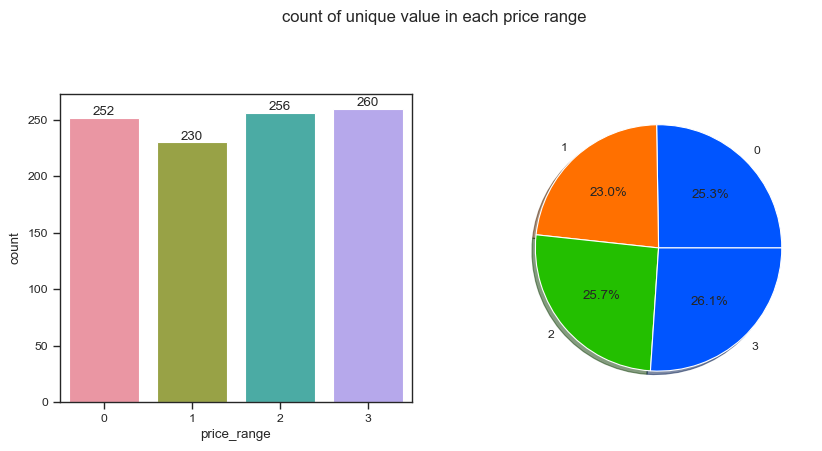

In [339]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=data_test,x='price_range',ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container)
    
slices = data_test['price_range'].value_counts().sort_index().values
activities = [var for var in data_test['price_range'].value_counts().sort_index().index]
axes[1].pie(slices,labels=activities,shadow=True, autopct='%1.1f%%')

plt.suptitle(f'count of unique value in each price range',y=1.09)
plt.show()

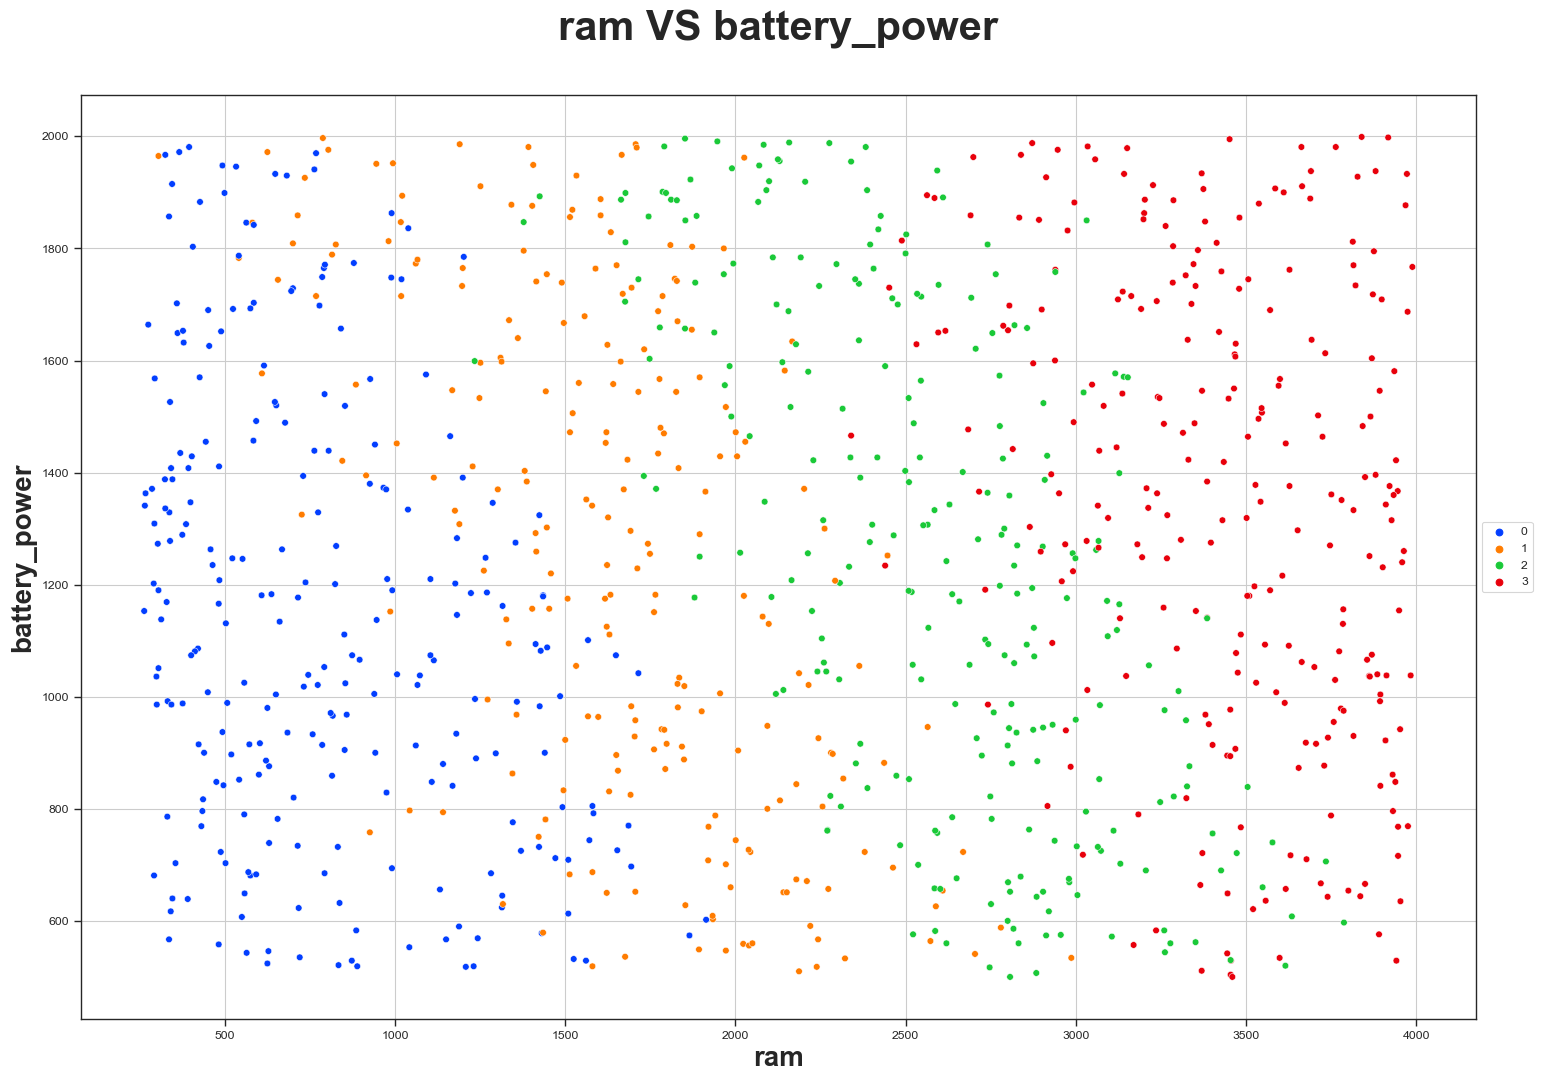

In [340]:
sns.set_palette('bright')
sns.scatterplot(data=data_test,x='ram',y='battery_power',hue='price_range',palette='bright')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.title("ram VS battery_power",fontsize=30,fontweight='bold',y=1.05)
plt.xlabel("ram",fontsize=20,fontweight='bold')
plt.ylabel('battery_power',fontsize=20,fontweight='bold')
plt.grid()
plt.show()